shot_count                 16.578165
goal_count                  1.706928
xG                          1.660116
on_target                   5.603192
pass_count                644.600653
successfull_pass_count    499.035546
assists                     1.144723
key_passes                 11.824810
xA                          1.119747
dribble_count              22.253899
successfull_dribbles       12.384113
long_carries               92.401886
foul_committed_count       20.068190
fouls_suffered_count       19.126224
penalites_won               6.045702
duel_count                 54.752267
won_duels                  15.616975
ball_recovery_count        70.513239
dispossessed_count         17.248458
clearance_count            31.709104
interception_count         15.795793
block_count                25.976786
tackle_count               25.855277
successful_tackles          6.380123
pressure_count            216.186072
dtype: float64
Athletic Club
ok


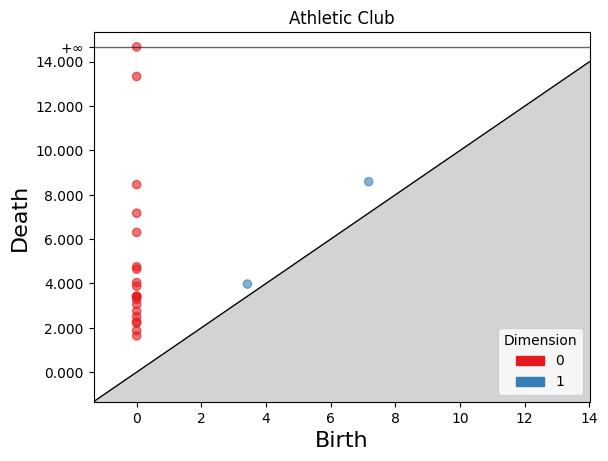

Atlético Madrid
ok


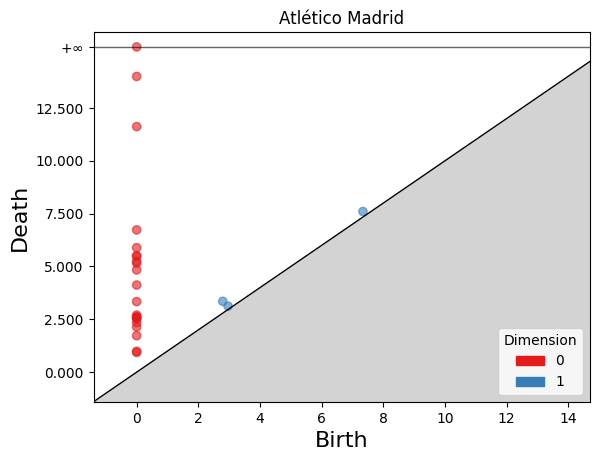

Barcelona
ok


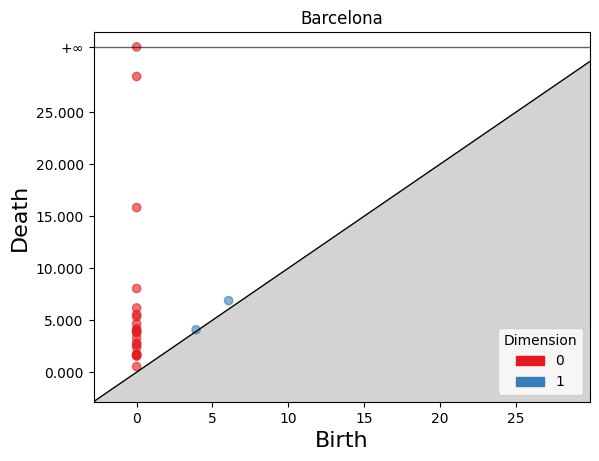

Celta Vigo
ok


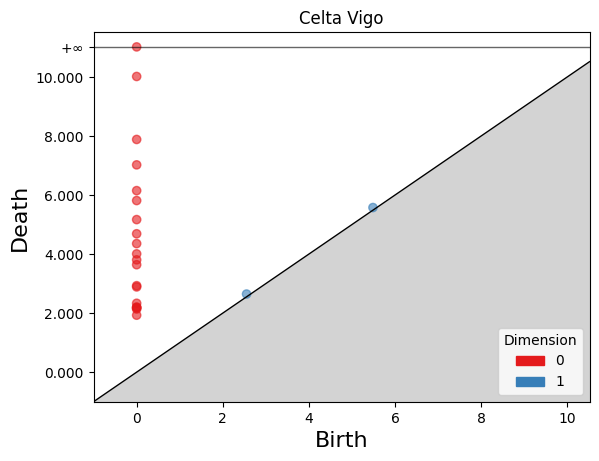

Eibar
ok


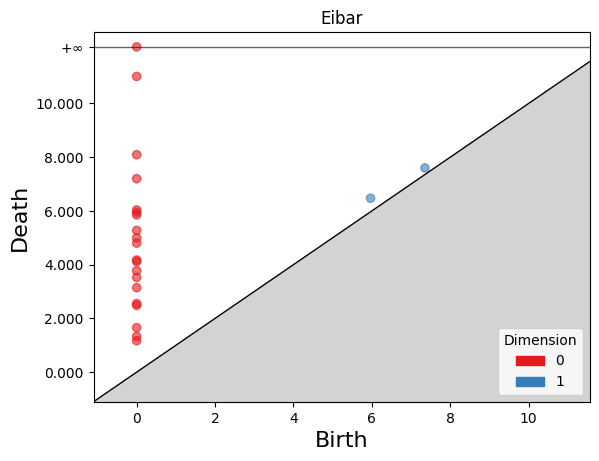

Espanyol
ok


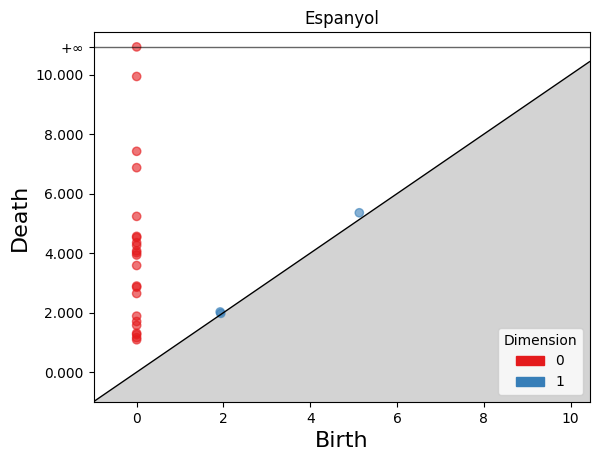

Getafe
ok


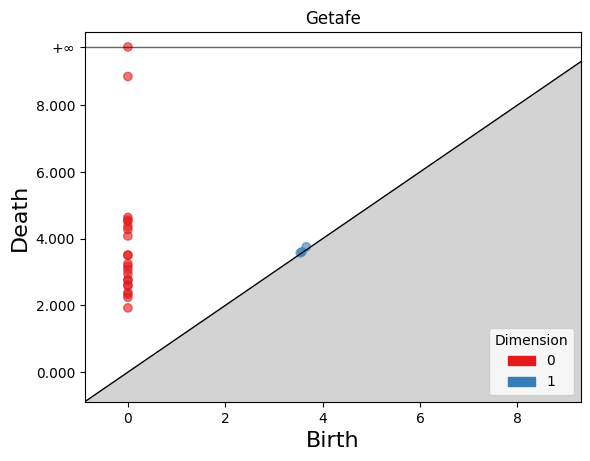

Granada
ok


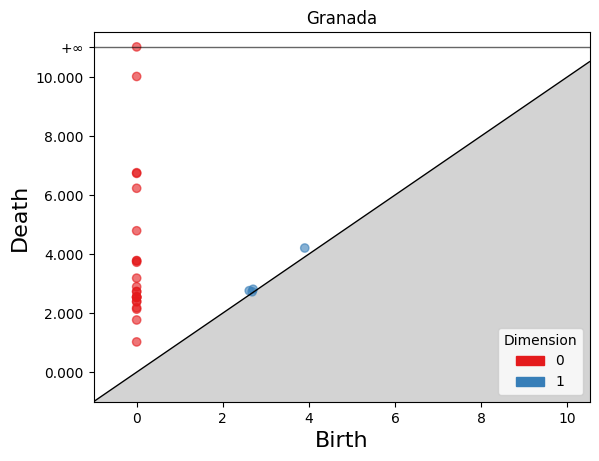

Las Palmas
ok


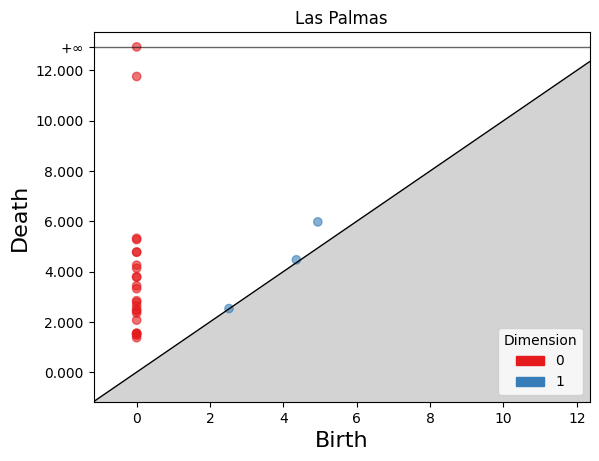

Levante UD
ok


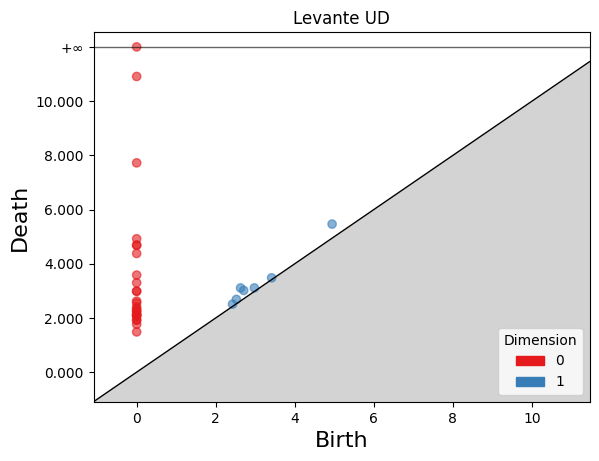

Málaga
ok


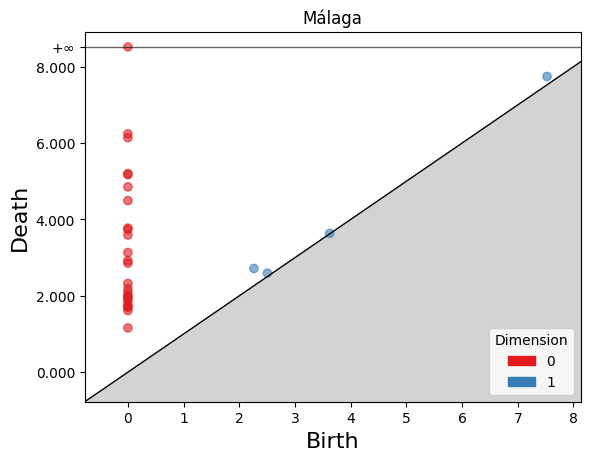

RC Deportivo La Coruña
ok


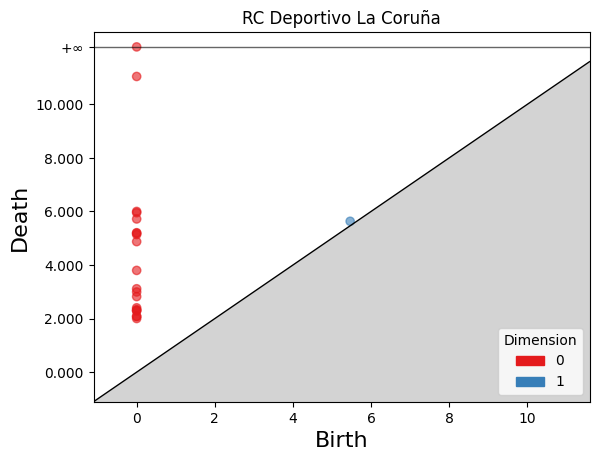

Rayo Vallecano
ok


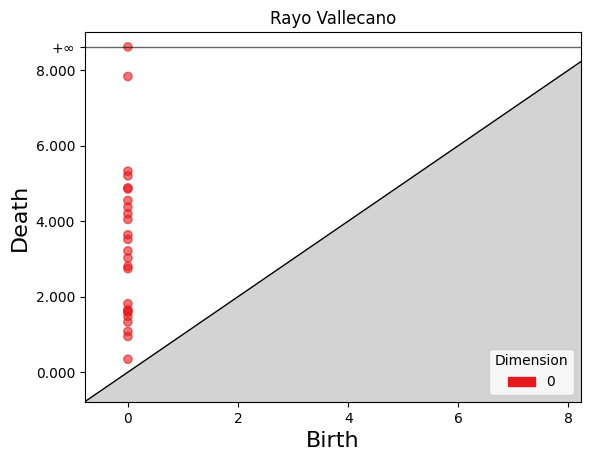

Real Betis
ok


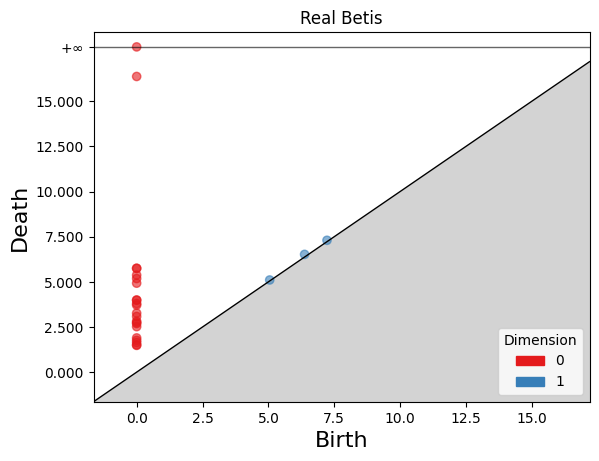

Real Madrid
ok


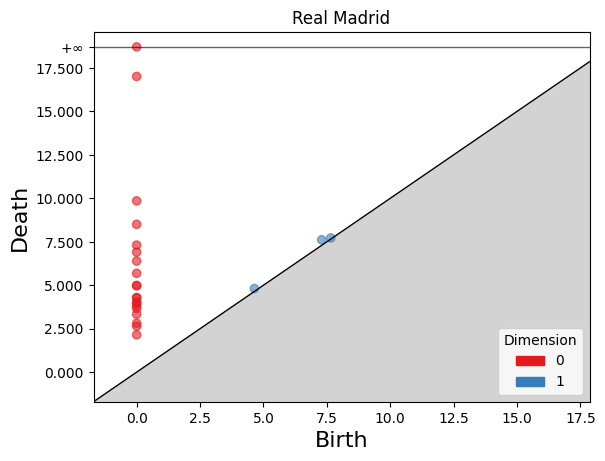

Real Sociedad
ok


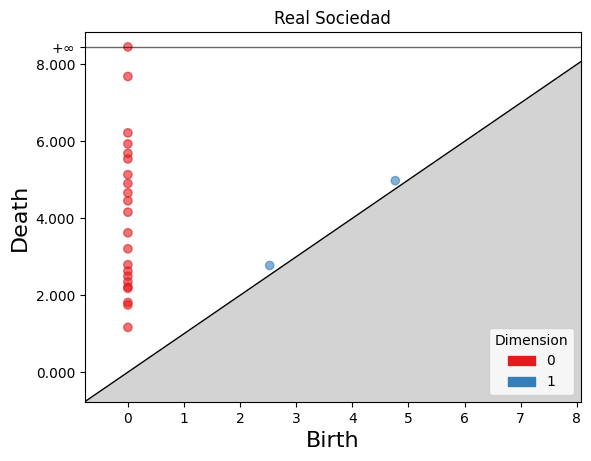

Sevilla
ok


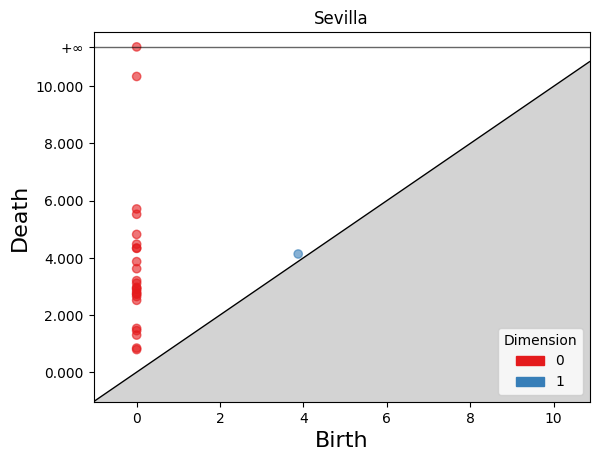

Sporting Gijón
ok


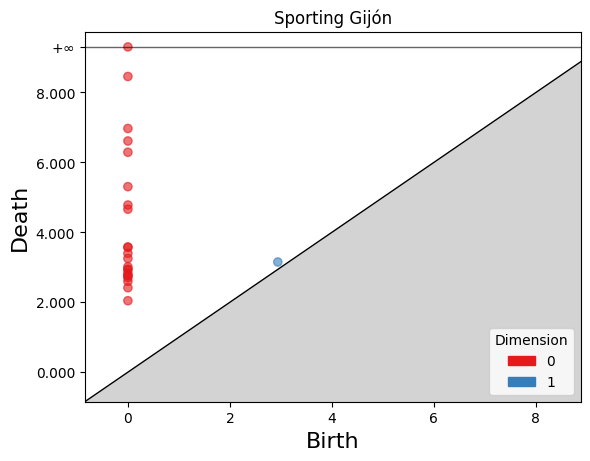

Valencia
ok


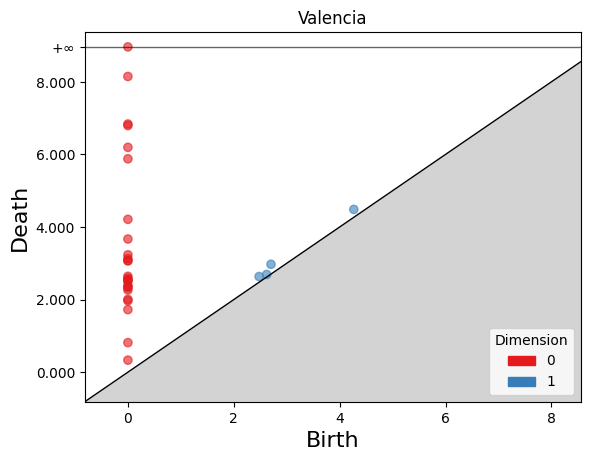

Villarreal
ok


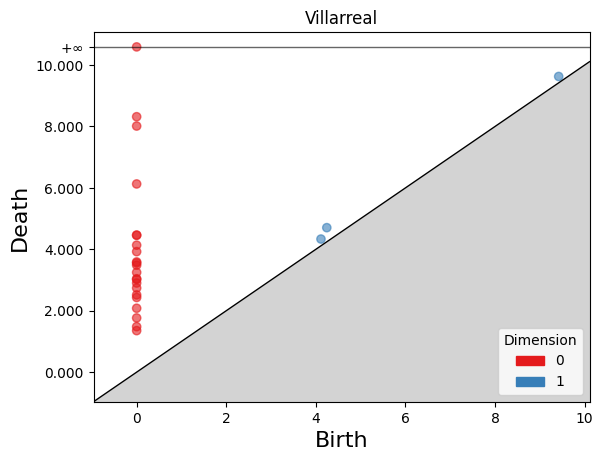

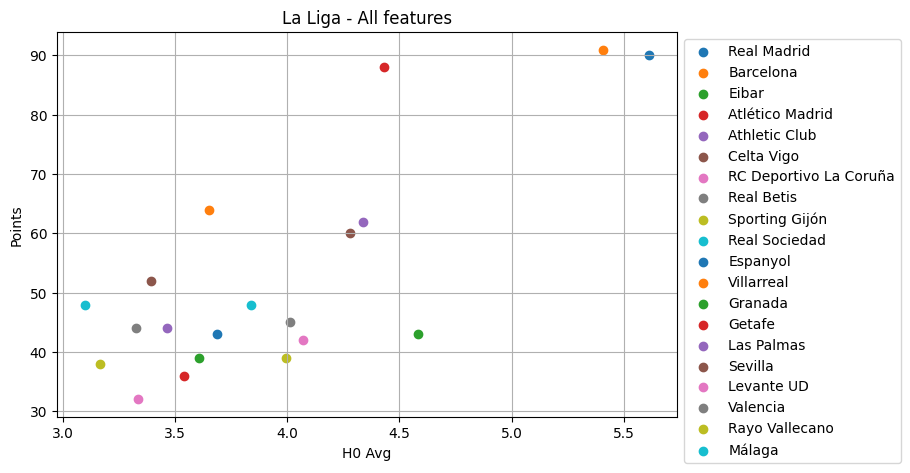

Augsburg
ok


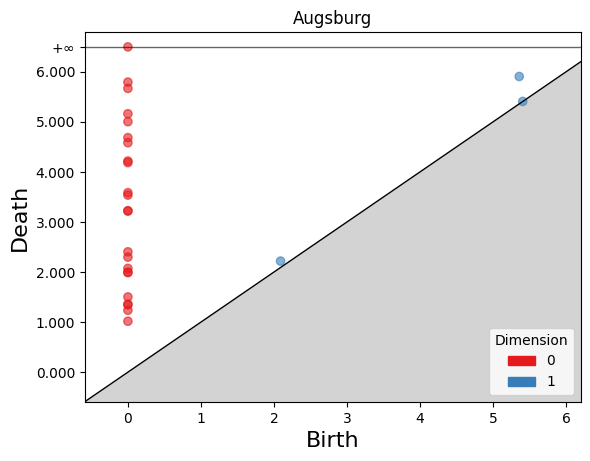

Bayer Leverkusen
ok


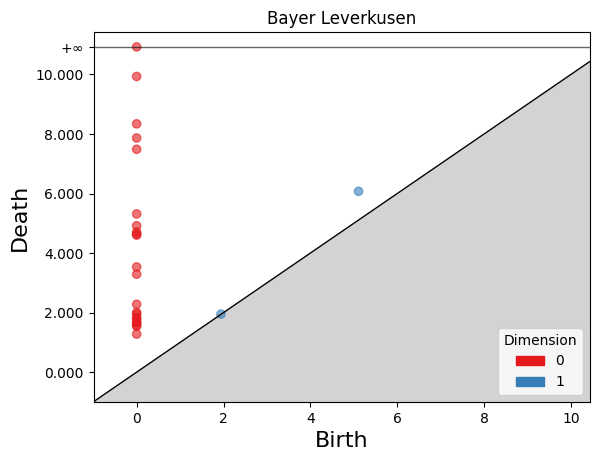

Bayern Munich
ok


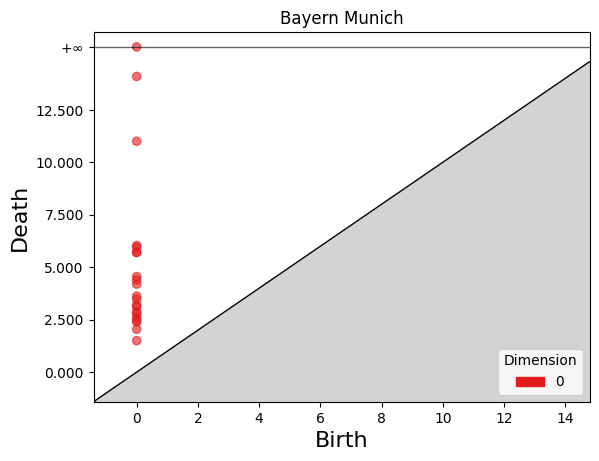

Borussia Dortmund
ok


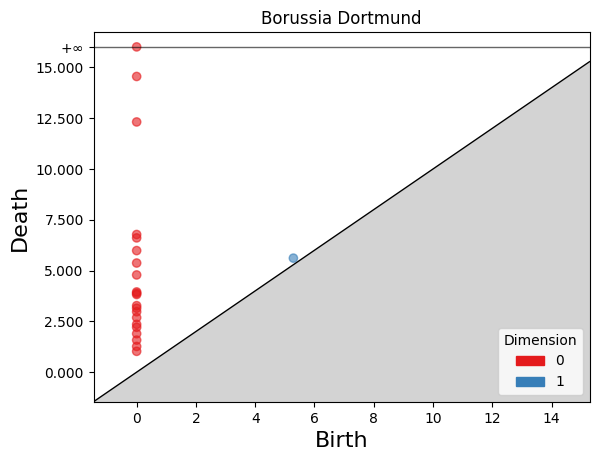

Borussia Mönchengladbach
ok


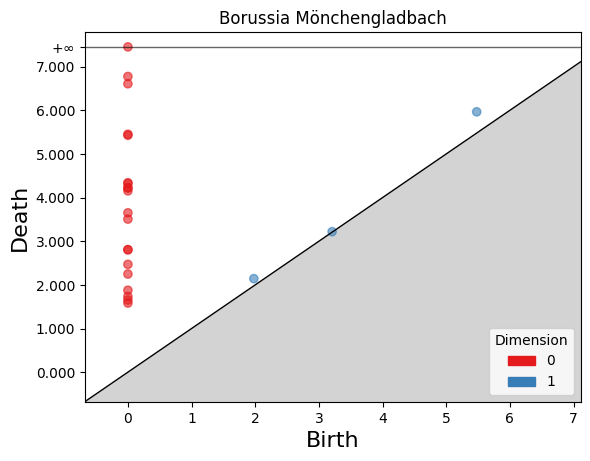

Darmstadt 98
ok


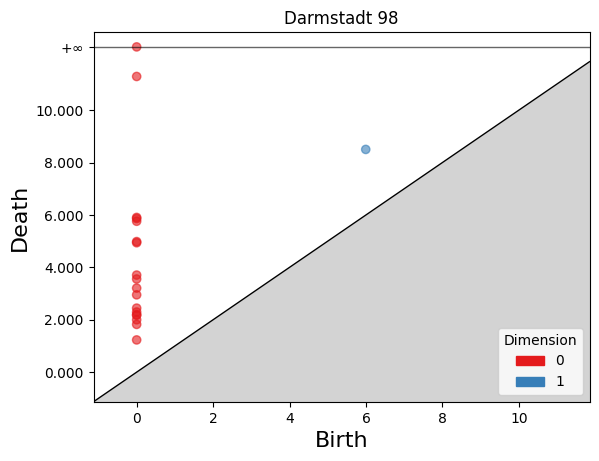

Eintracht Frankfurt
ok


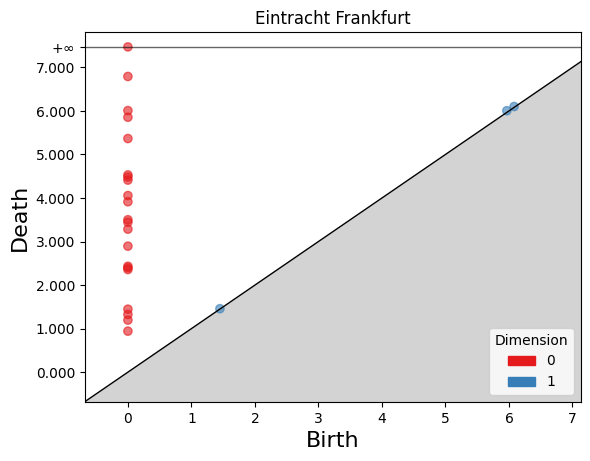

FC Köln
ok


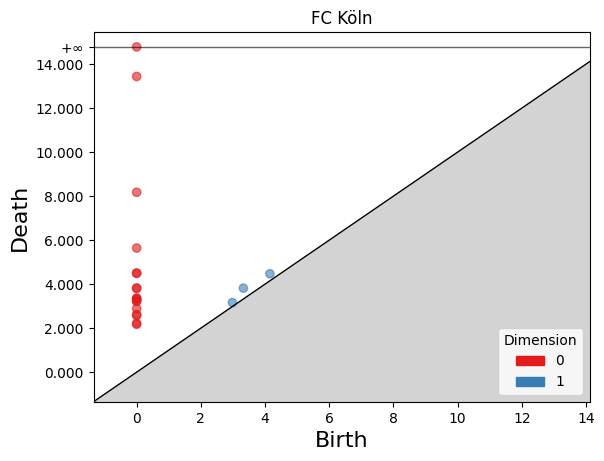

FSV Mainz 05
ok


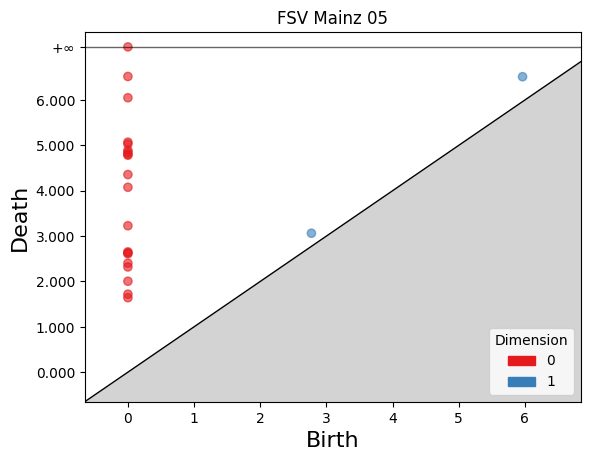

Hamburger SV
ok


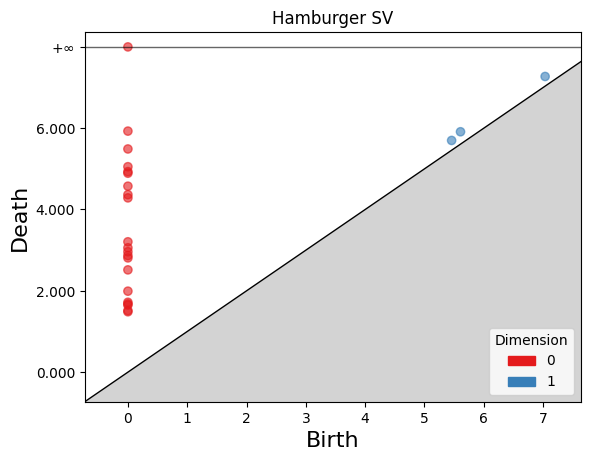

Hannover 96
ok


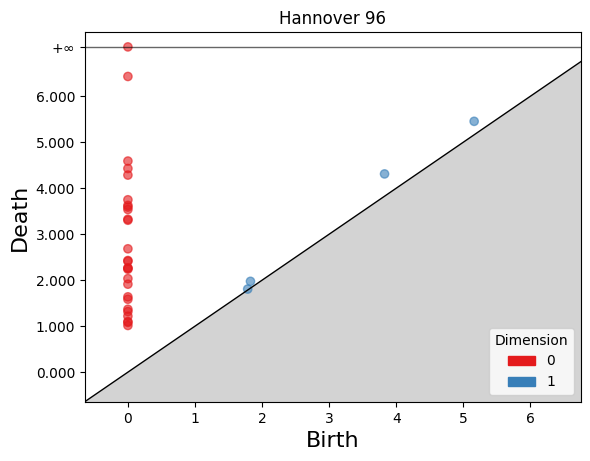

Hertha Berlin
ok


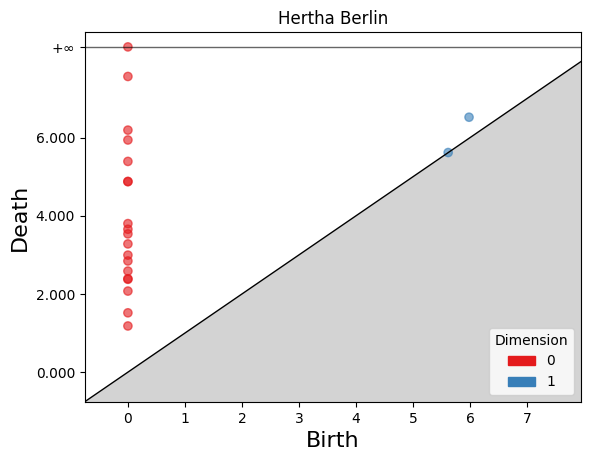

Hoffenheim
ok


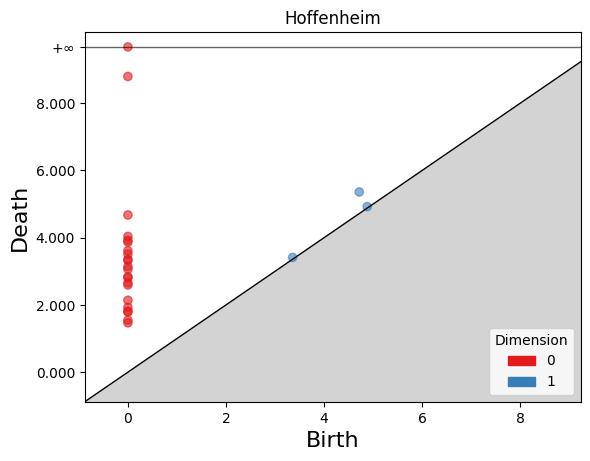

Ingolstadt
ok


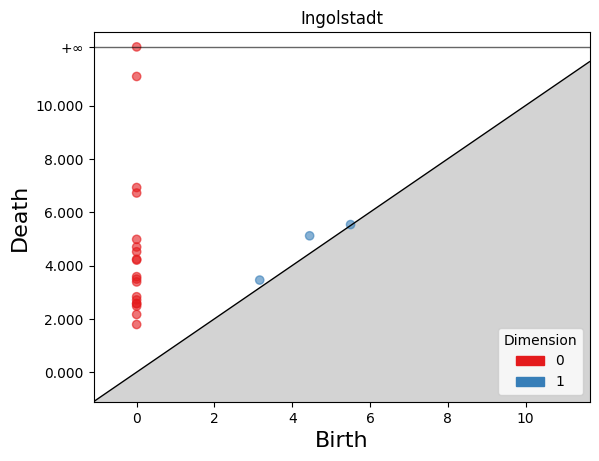

Schalke 04
ok


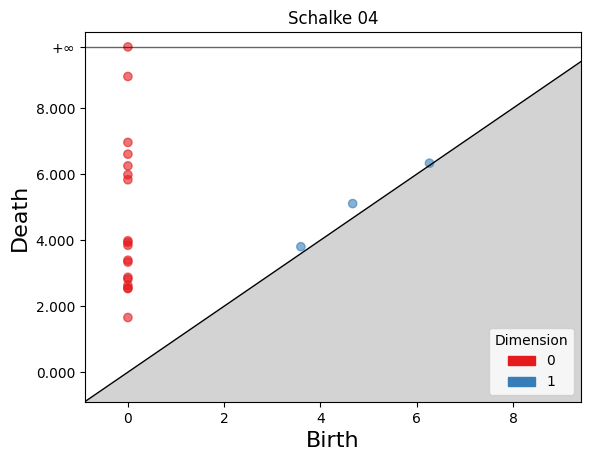

VfB Stuttgart
ok


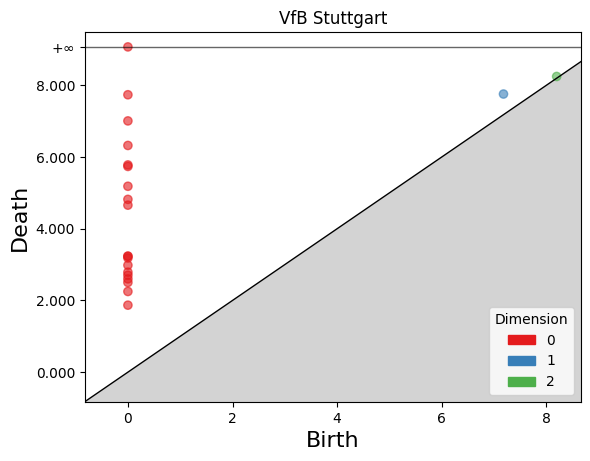

Werder Bremen
ok


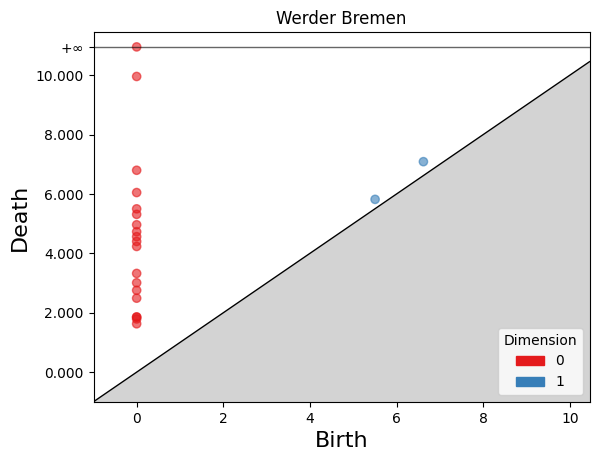

Wolfsburg
ok


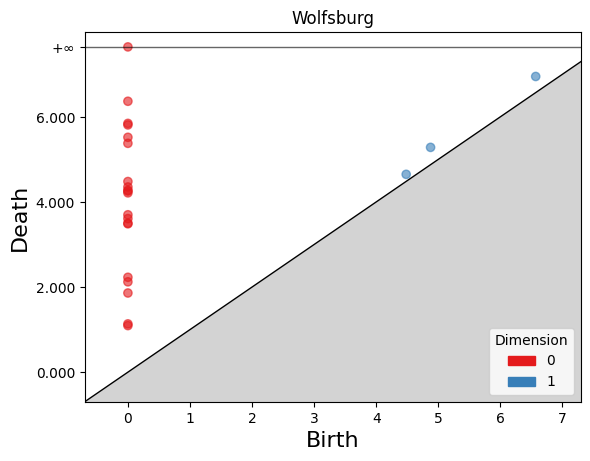

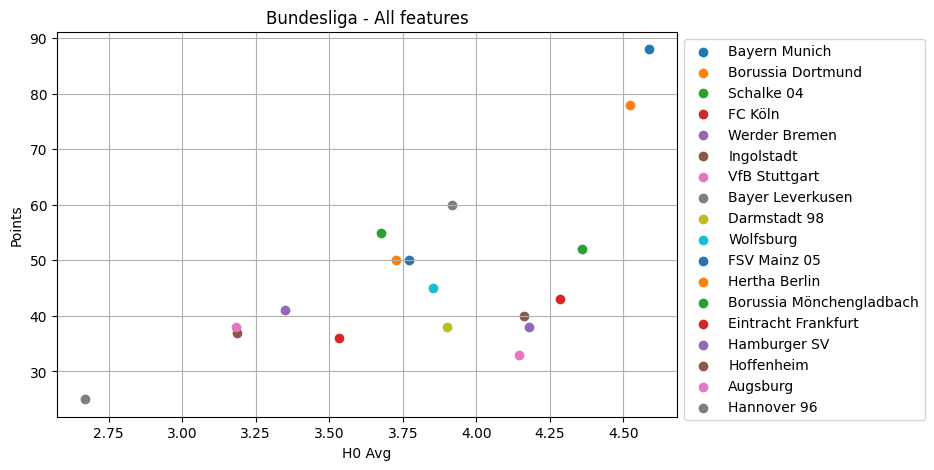

AFC Bournemouth
ok


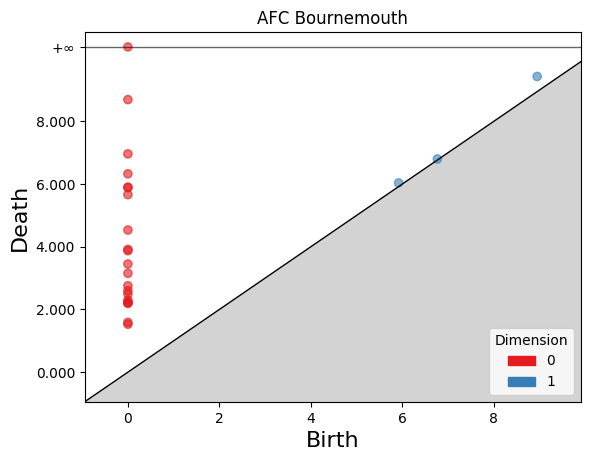

Arsenal
ok


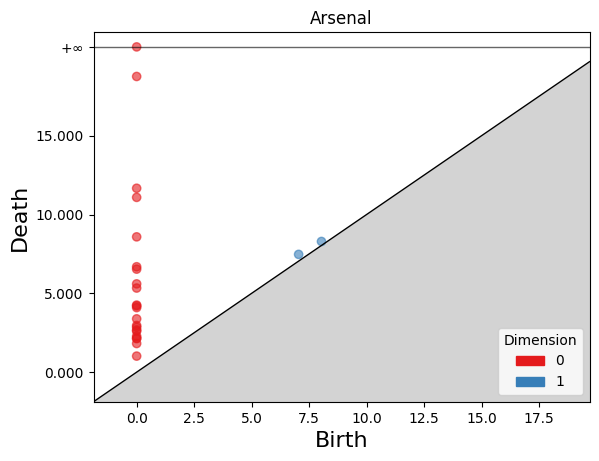

Aston Villa
ok


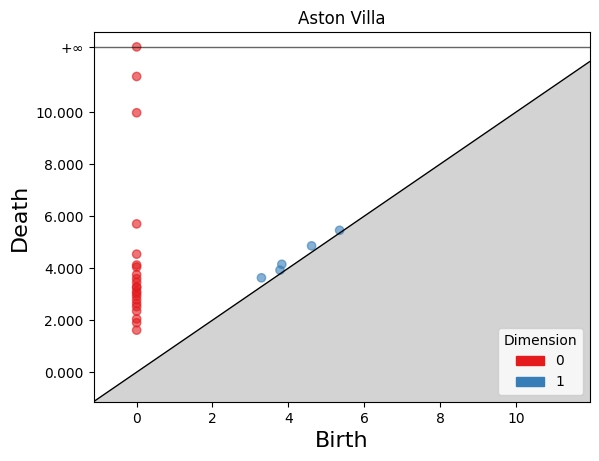

Chelsea
ok


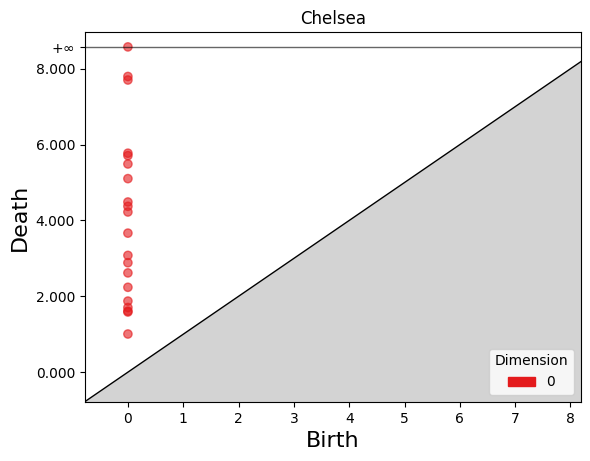

Crystal Palace
ok


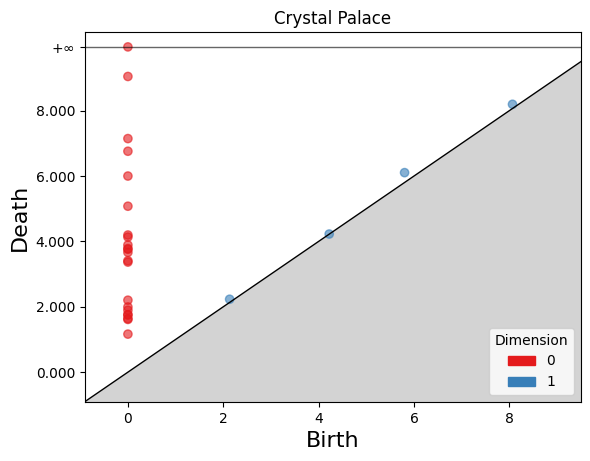

Everton
ok


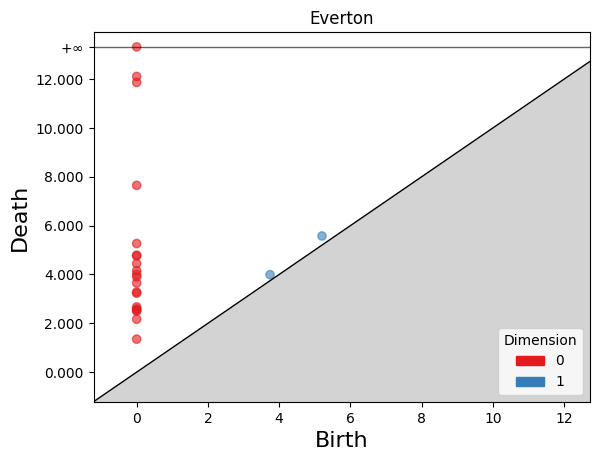

Leicester City
ok


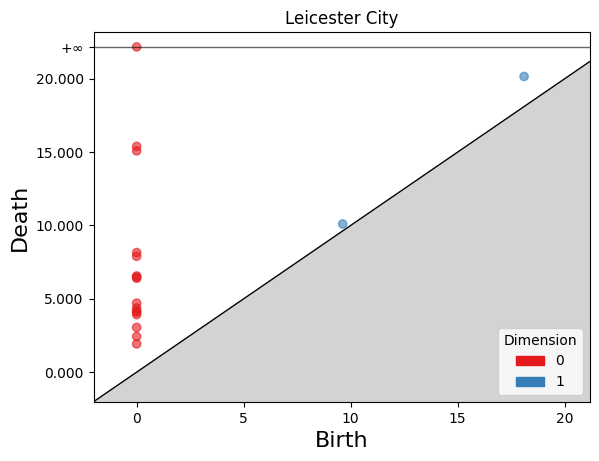

Liverpool
ok


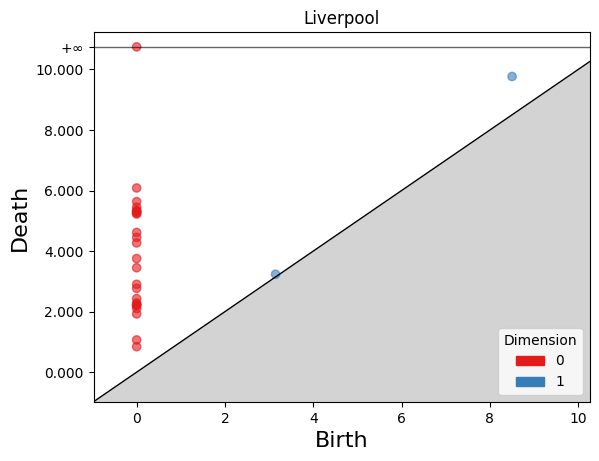

Manchester City
ok


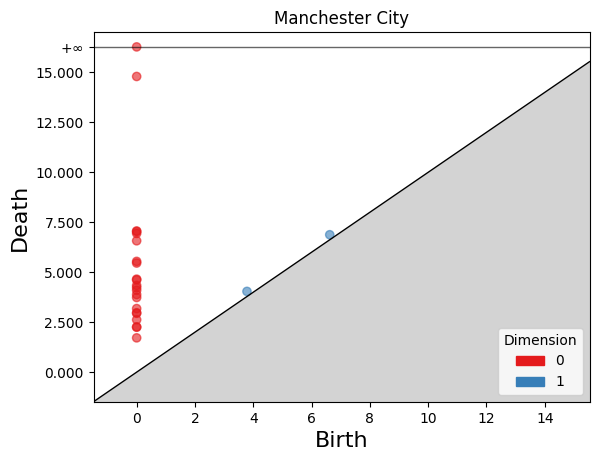

Manchester United
ok


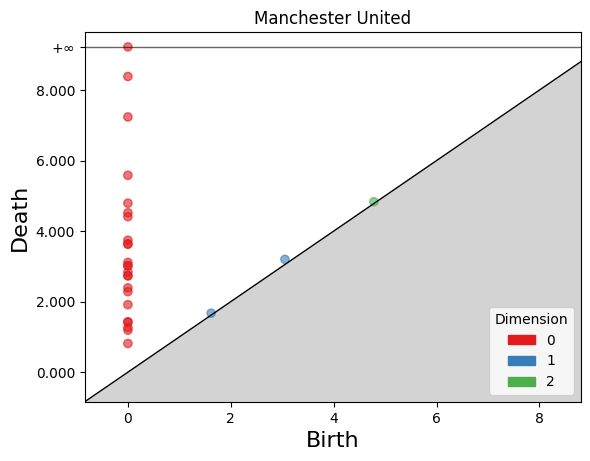

Newcastle United
ok


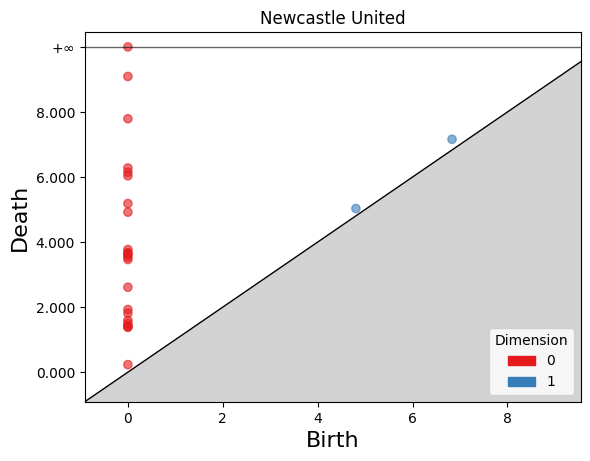

Norwich City
ok


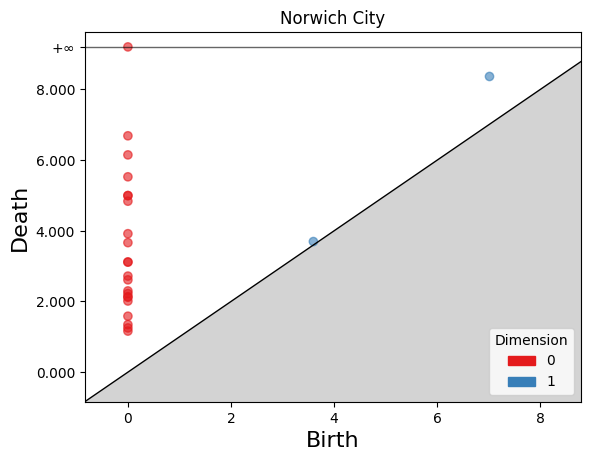

Southampton
ok


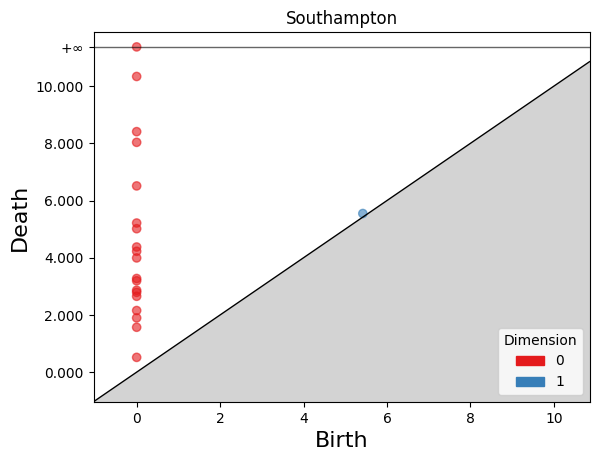

Stoke City
ok


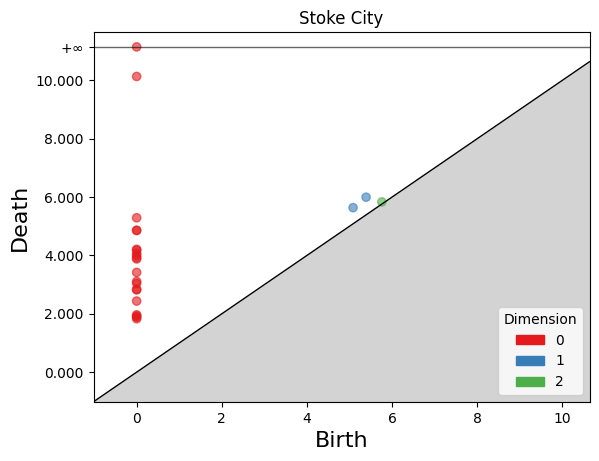

Sunderland
ok


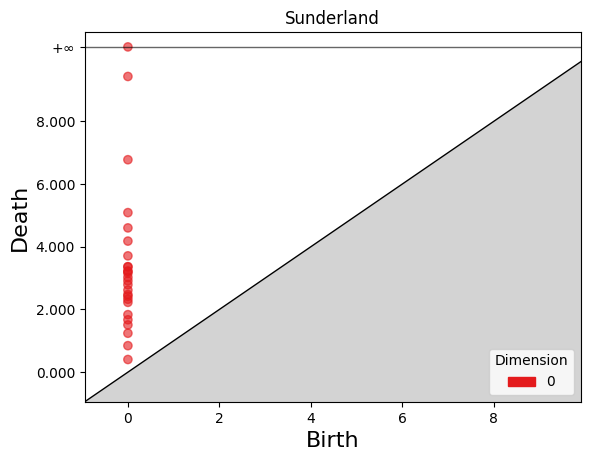

Swansea City
ok


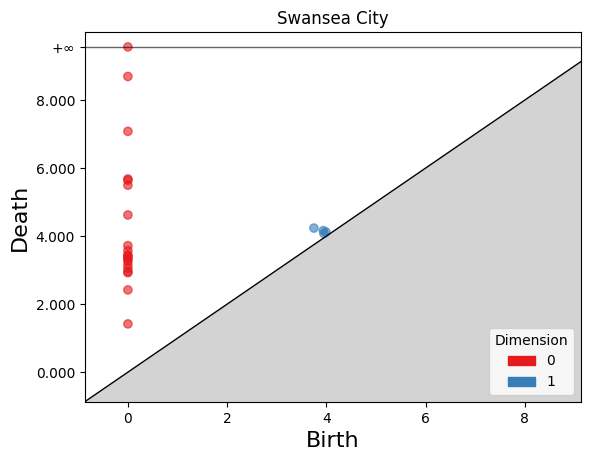

Tottenham Hotspur
ok


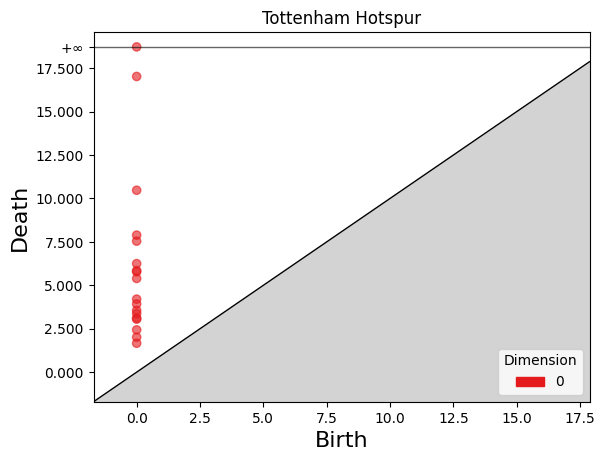

Watford
ok


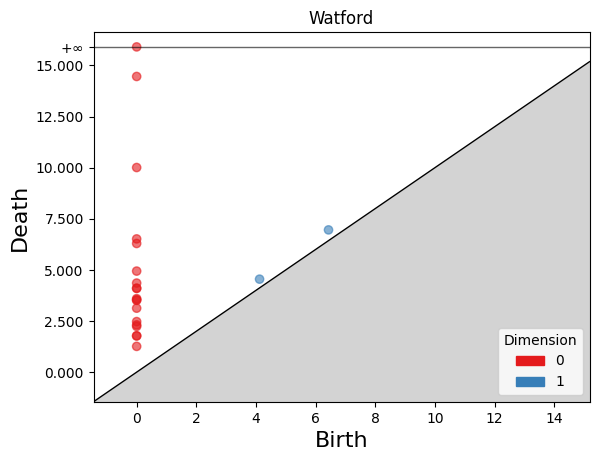

West Bromwich Albion
ok


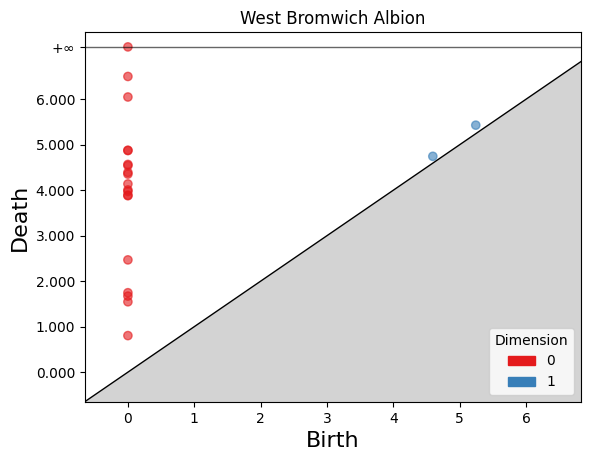

West Ham United
ok


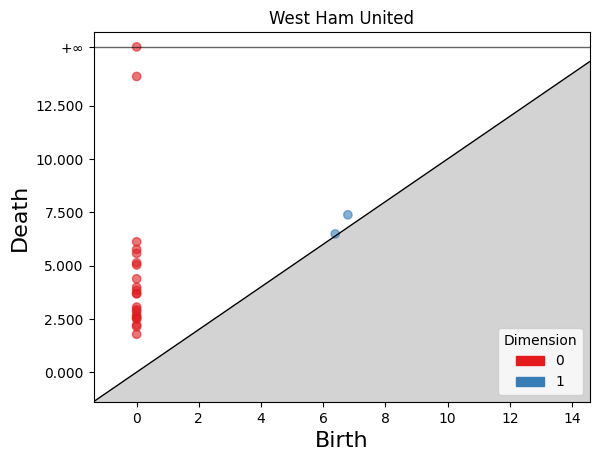

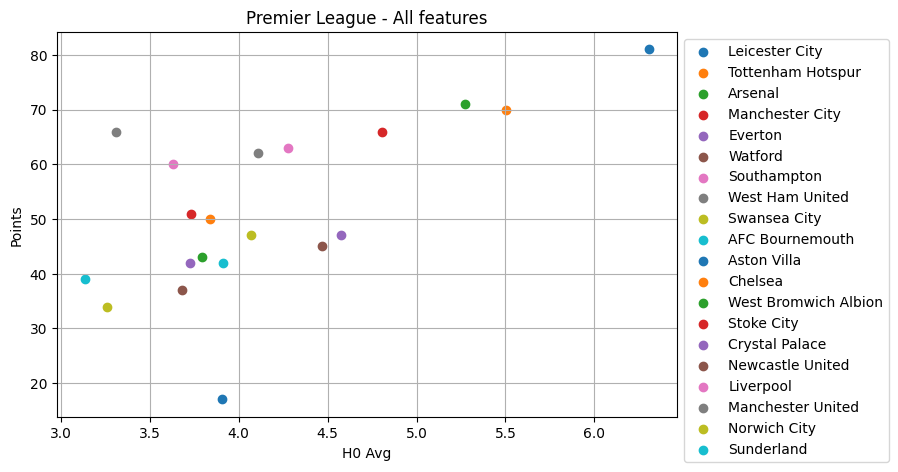

AC Milan
ok


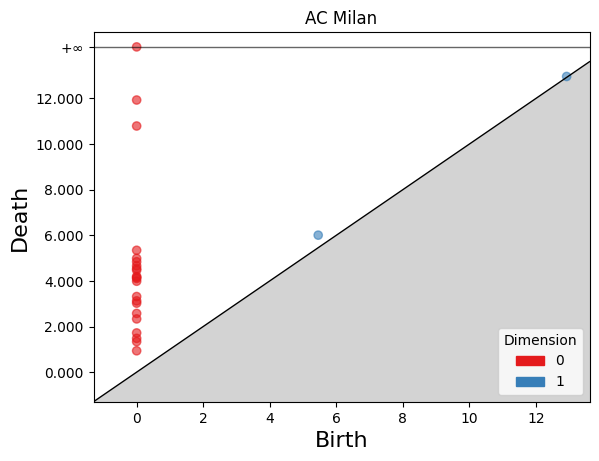

AS Roma
ok


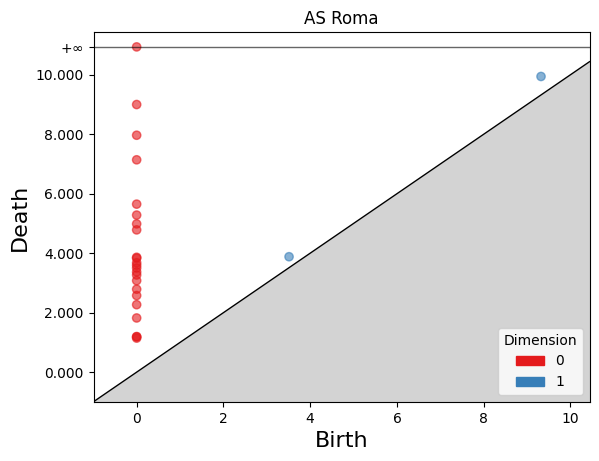

Atalanta
ok


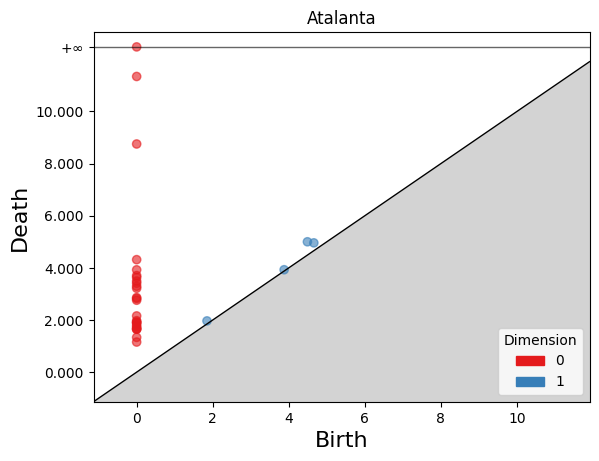

Bologna
ok


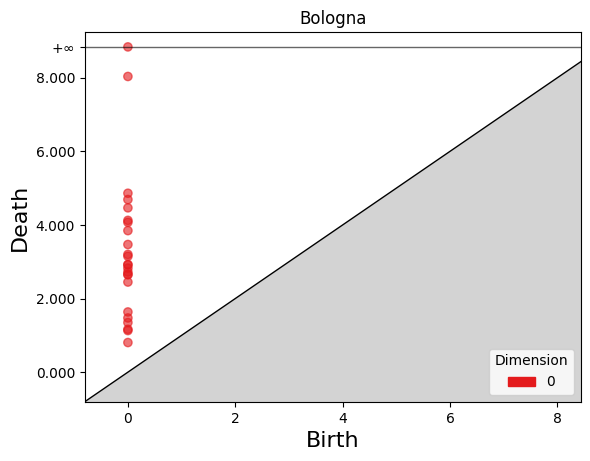

Carpi
ok


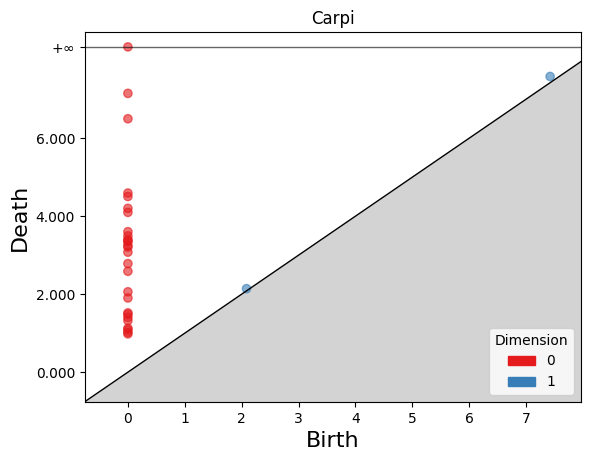

Chievo
ok


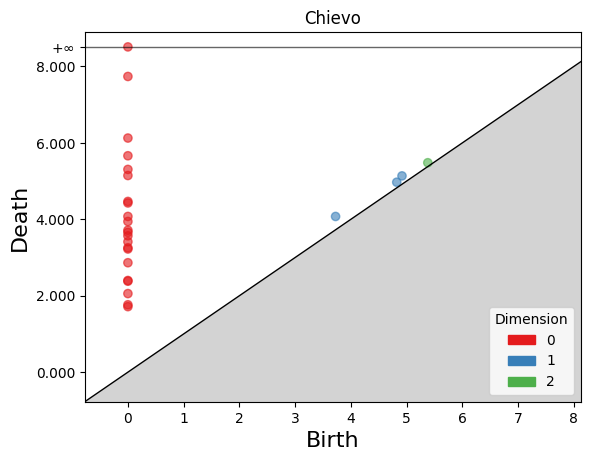

Empoli
ok


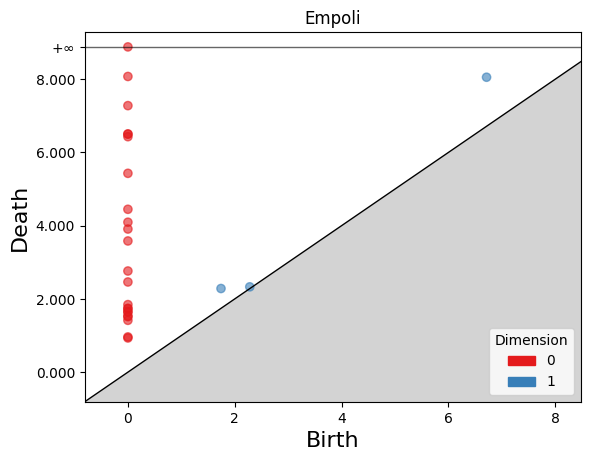

Fiorentina
ok


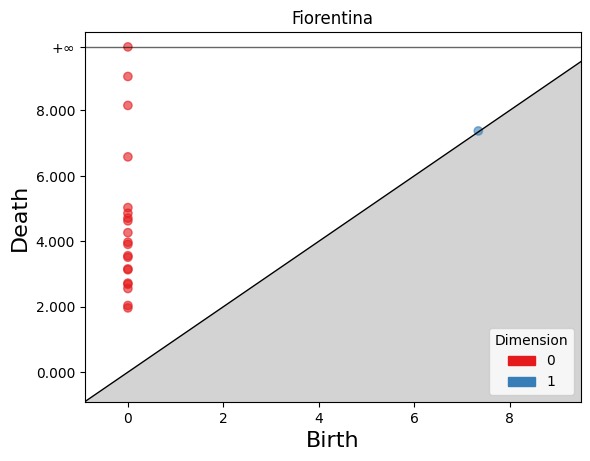

Frosinone
ok


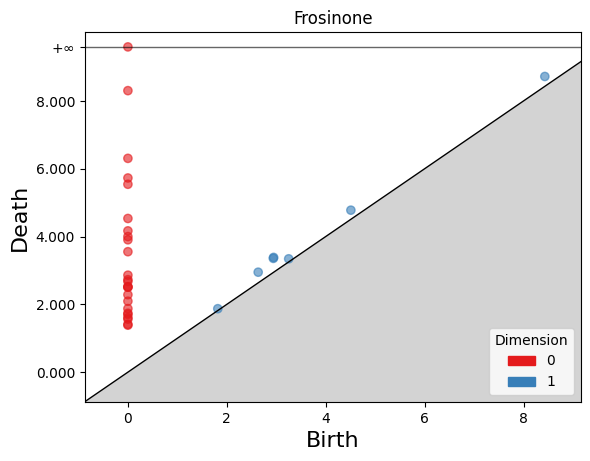

Genoa
ok


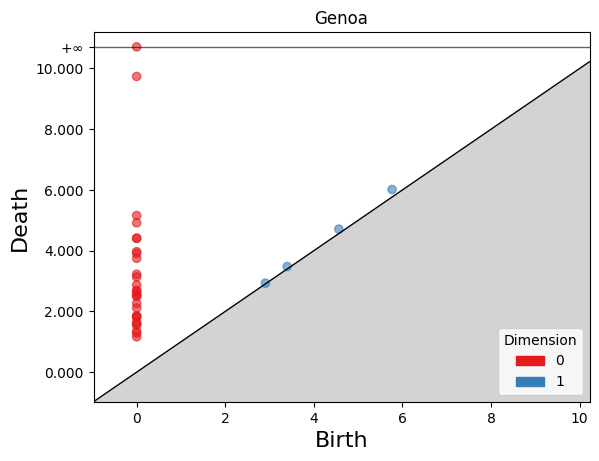

Hellas Verona
ok


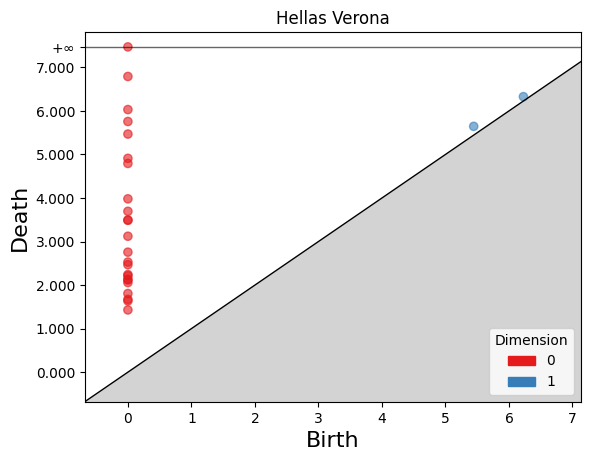

Inter Milan
ok


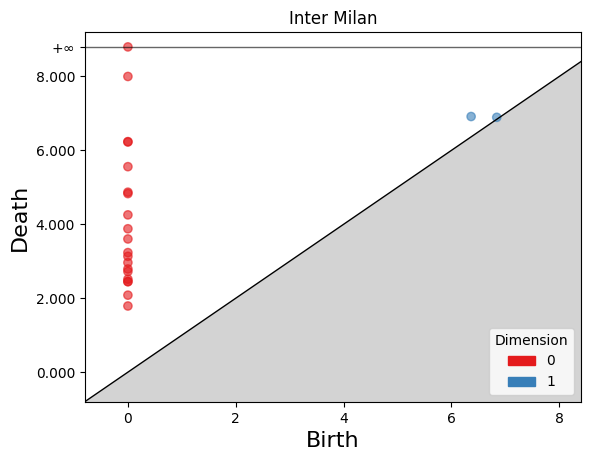

Juventus
ok


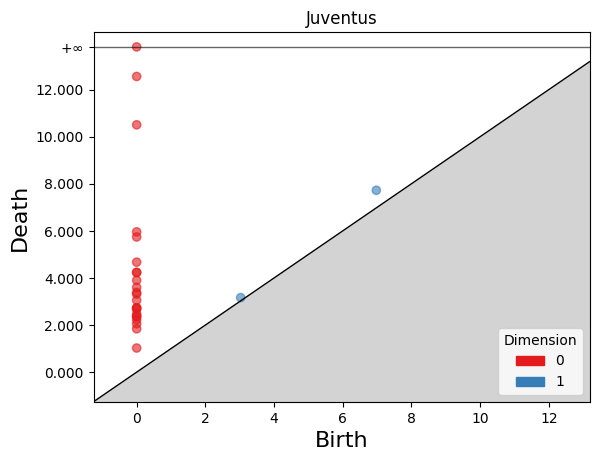

Lazio
ok


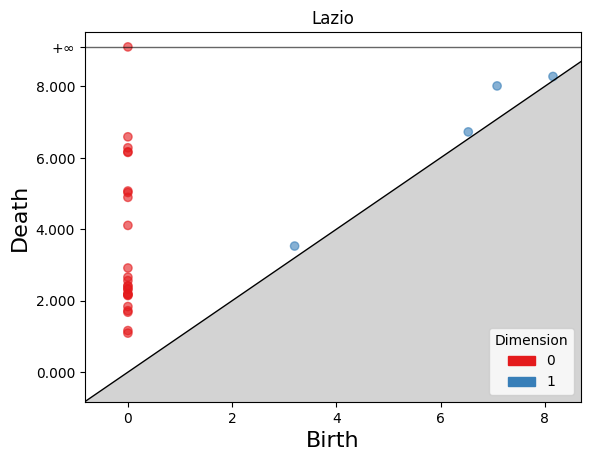

Napoli
ok


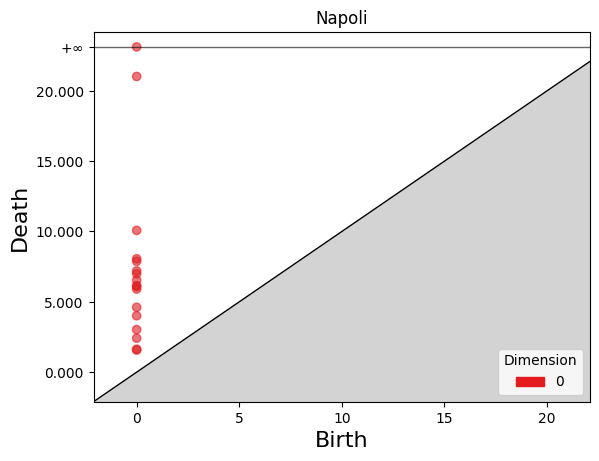

Palermo
ok


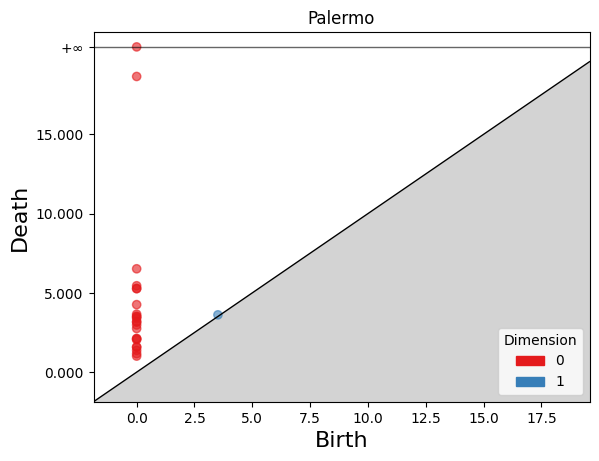

Sampdoria
ok


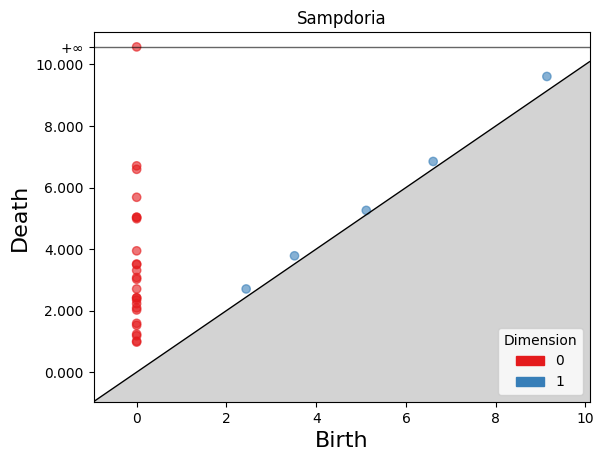

Sassuolo
ok


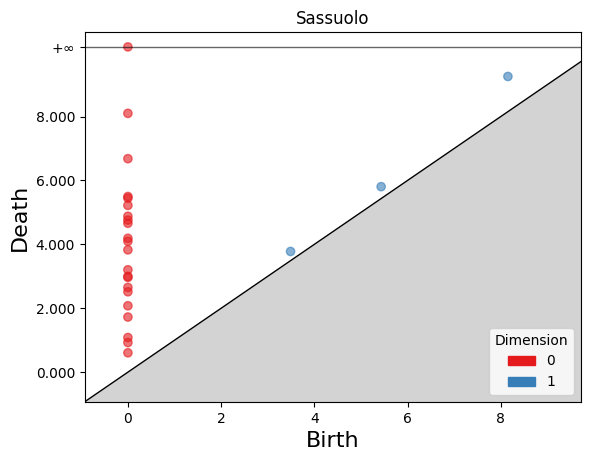

Torino
ok


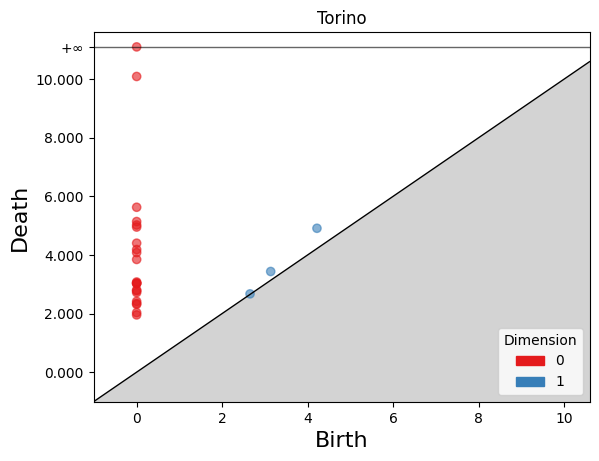

Udinese
ok


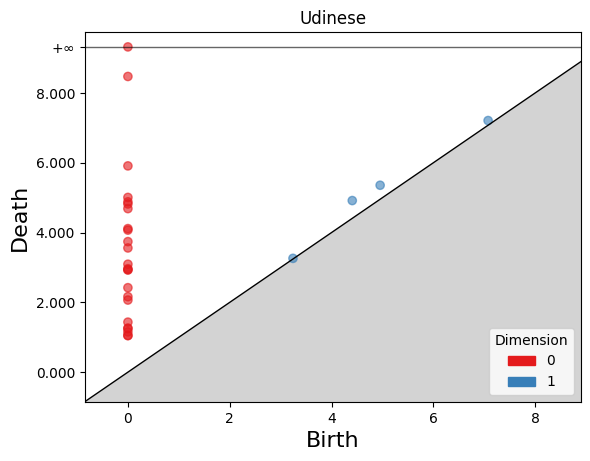

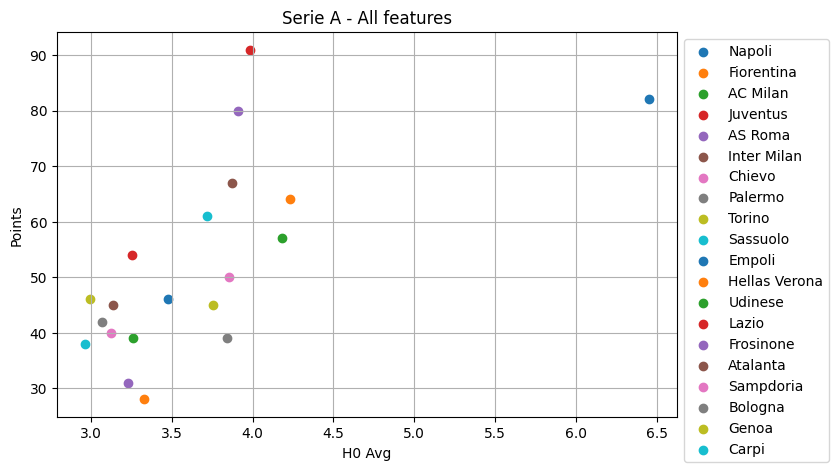

AS Monaco
ok


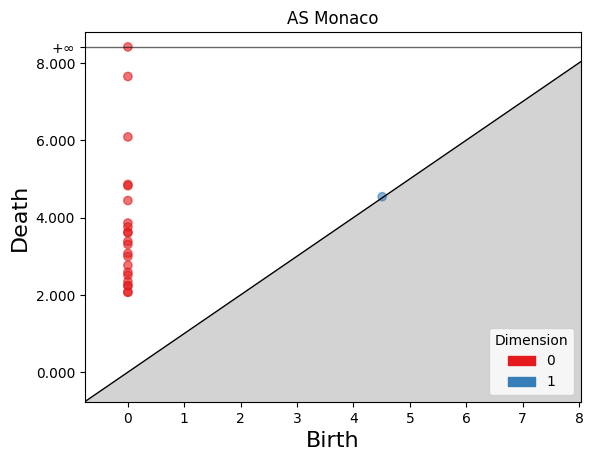

Angers
ok


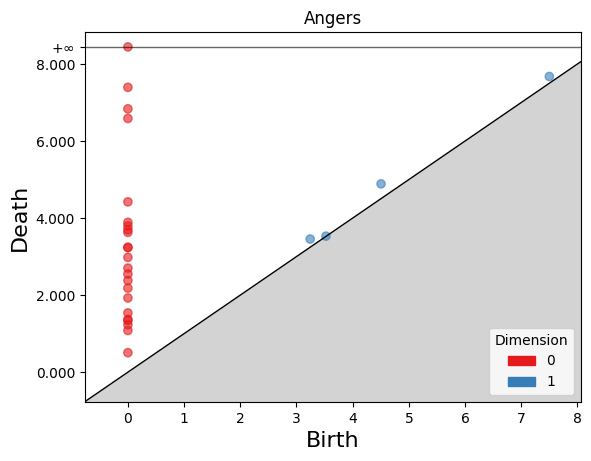

Bastia
ok


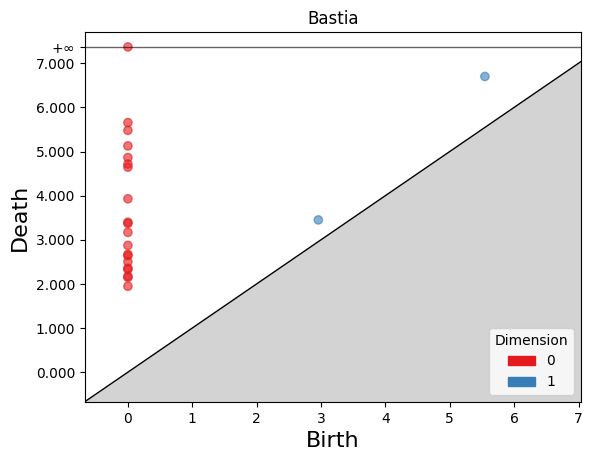

Bordeaux
ok


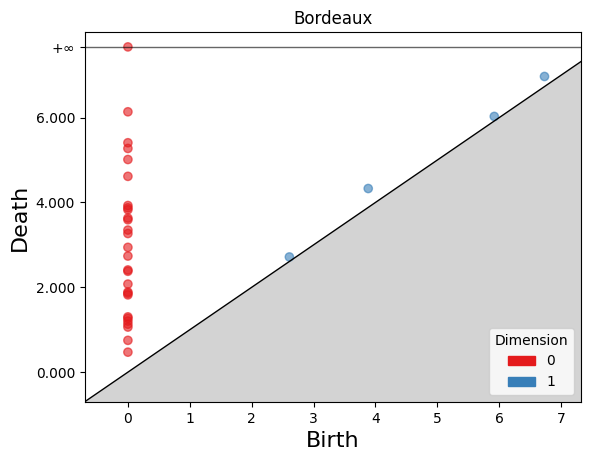

Caen
ok


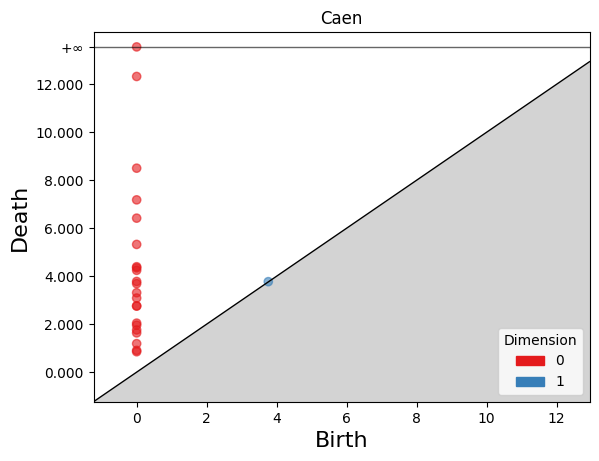

Gazélec Ajaccio
ok


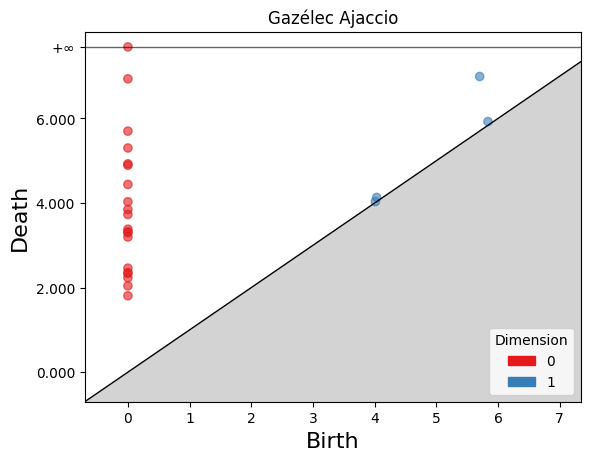

Guingamp
ok


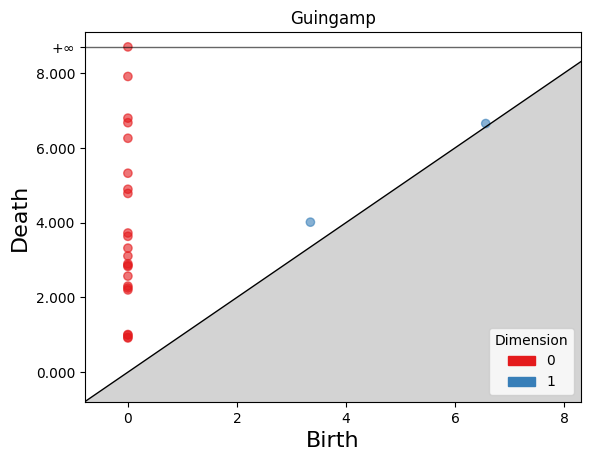

Lille
ok


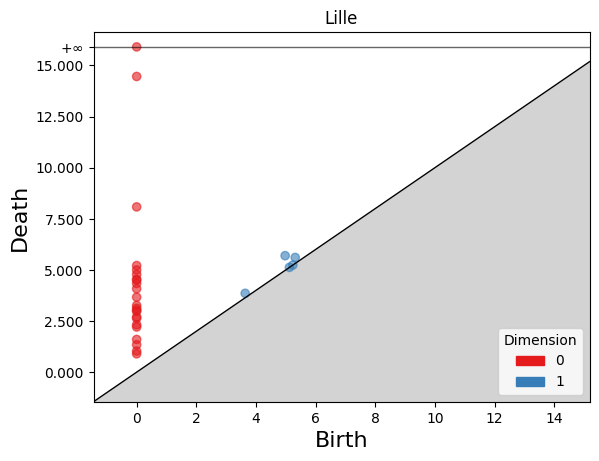

Lorient
ok


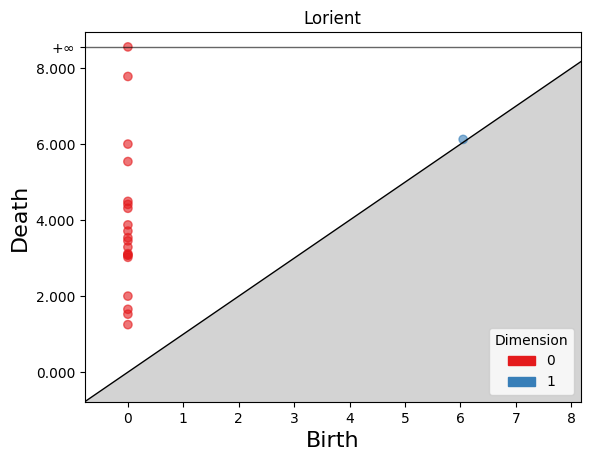

Lyon
ok


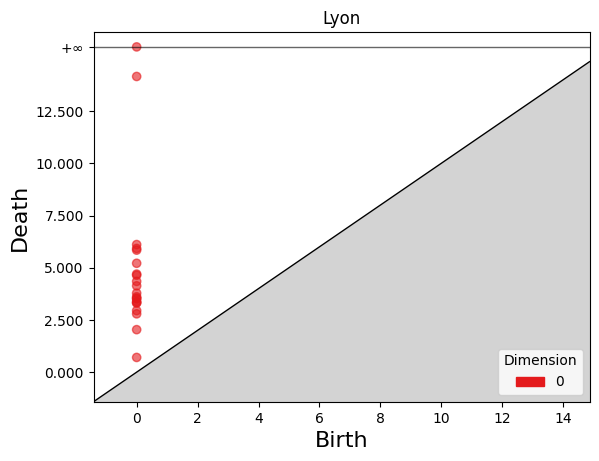

Marseille
ok


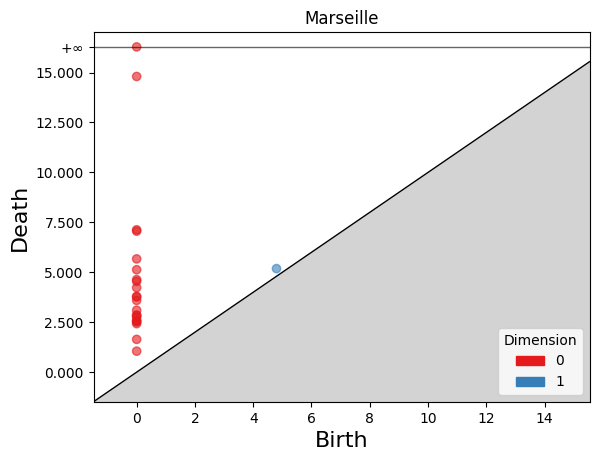

Montpellier
ok


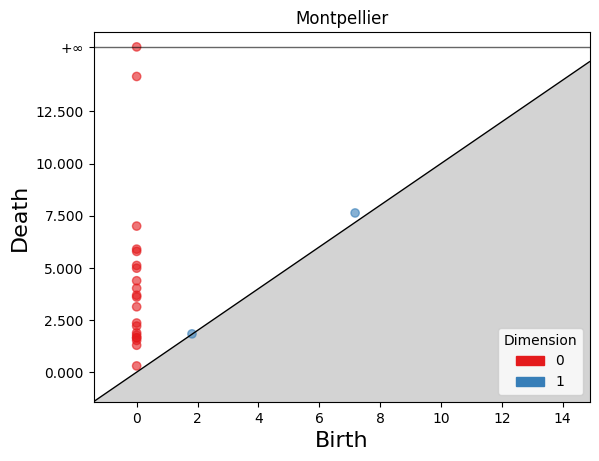

Nantes
ok


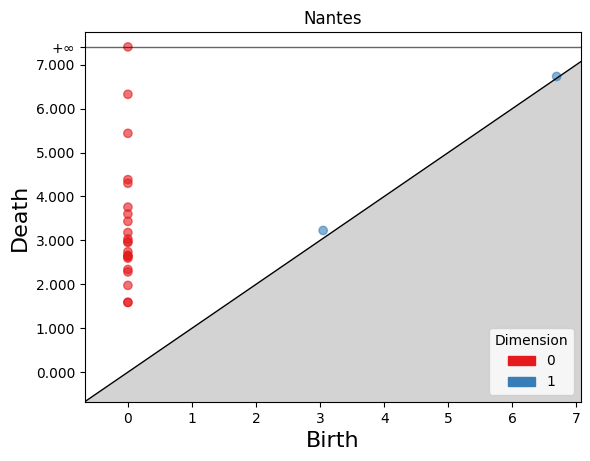

OGC Nice
ok


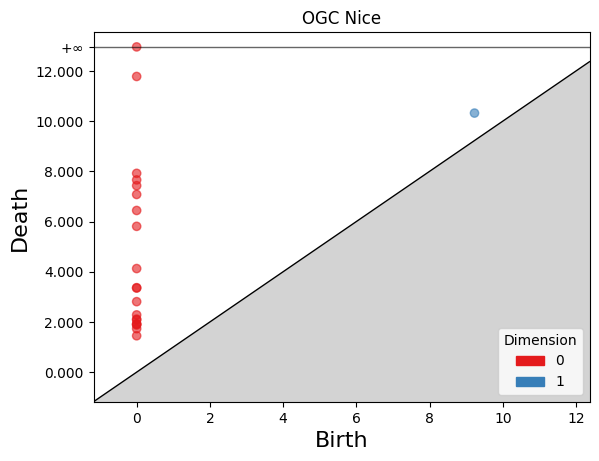

Paris Saint-Germain
ok


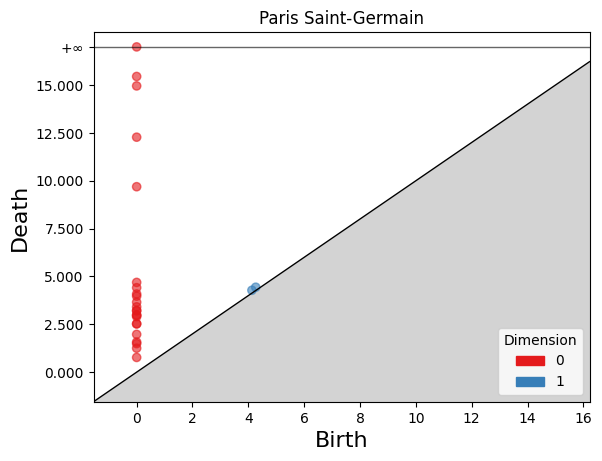

Rennes
ok


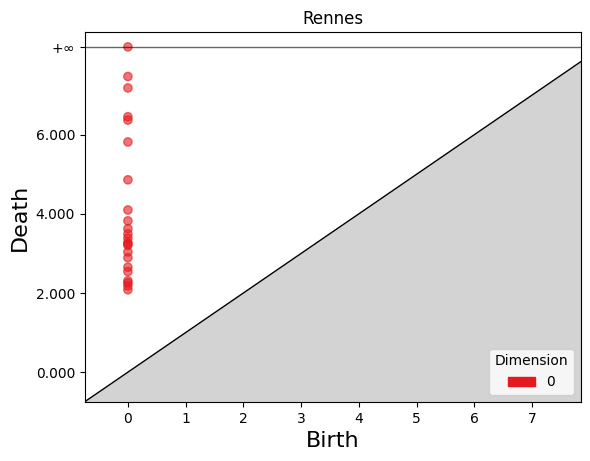

Saint-Étienne
ok


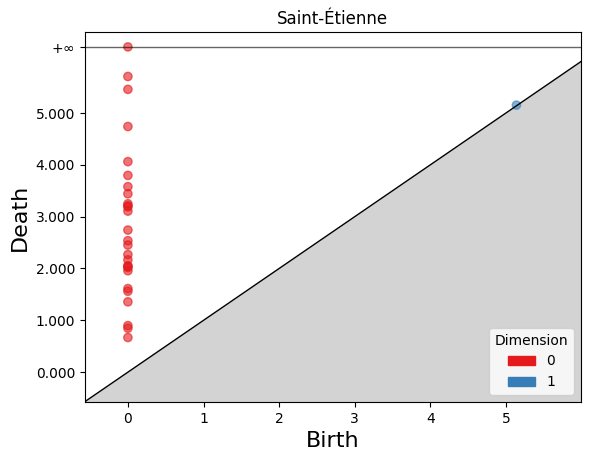

Stade de Reims
ok


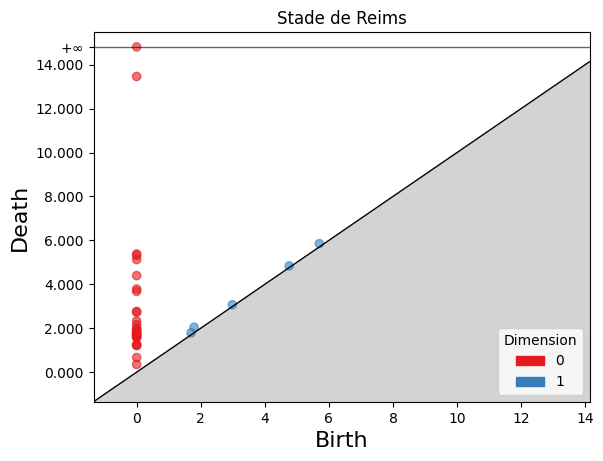

Toulouse
ok


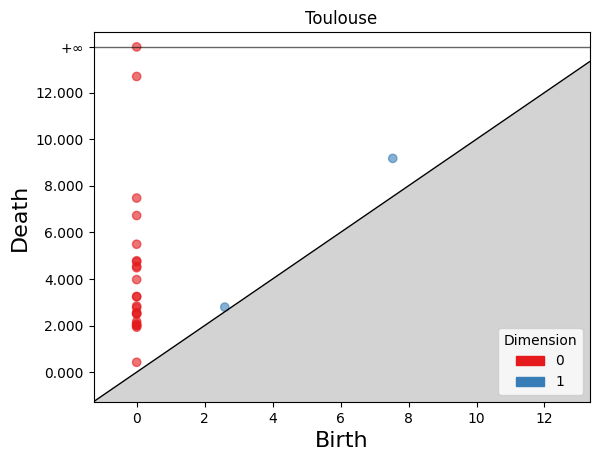

Troyes
ok


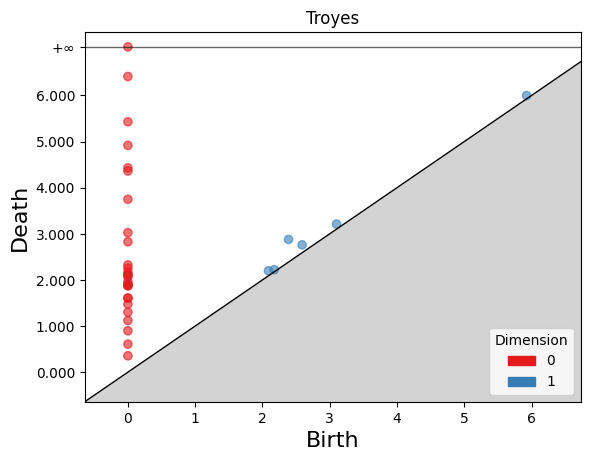

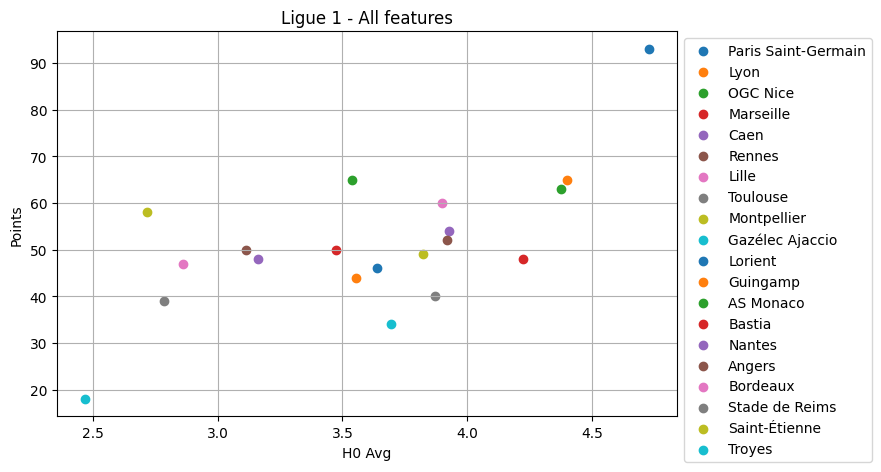

In [1]:
# PERZISZTENCIA DIAGRAMS USING AVG PLAYER PROFILE

import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsbombpy import sb
import re
import pandas as pd
import os
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)
# (11, "La Liga", "La_Liga"), (9, "Bundesliga", "Bundesliga"),(2, "Premier League", "Premier_League"), (12, "Serie A", "Serie_A"),  (7, "Ligue 1", "Ligue_1") ,
top5 = [(11, "La Liga", "La_Liga"), (9, "Bundesliga", "Bundesliga"),(2, "Premier League", "Premier_League"), (12, "Serie A", "Serie_A"),  (7, "Ligue 1", "Ligue_1")]
all_fetaures = ['player_id', 'player_name', 'minutes_played', 'shot_count',
       'goal_count', 'xG', 'on_target', 'pass_count', 'successfull_pass_count',
       'assists', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles',
       'long_carries', 'foul_committed_count', 'fouls_suffered_count',
       'penalites_won', 'duel_count', 'won_duels', 'ball_recovery_count',
       'dispossessed_count', 'clearance_count', 'interception_count',
       'block_count', 'tackle_count', 'successful_tackles', 'pressure_count']

countable_features = ['shot_count',
       'goal_count', 'xG', 'on_target', 'pass_count', 'successfull_pass_count',
       'assists', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles',
       'long_carries', 'foul_committed_count', 'fouls_suffered_count',
       'penalites_won', 'duel_count', 'won_duels', 'ball_recovery_count',
       'dispossessed_count', 'clearance_count', 'interception_count',
       'block_count', 'tackle_count', 'successful_tackles', 'pressure_count']

attackingStats = ['shot_count', 'goal_count', 'xG', 'on_target', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles'];

possessionStats = ['pass_count', 'successfull_pass_count'];

defensiveStats = ['duel_count', 'won_duels', 'tackle_count', 'successful_tackles', 'pressure_count', 'ball_recovery_count', 'interception_count'];

physicalStats = ['foul_committed_count', 'fouls_suffered_count'];


selected_features = countable_features

selected_features_avg = []
player_count = 0


for (comp_id, comp_name, comp_safe_name) in top5:
    matches = sb.matches(competition_id=comp_id, season_id=27)
    teams = list(set(matches['home_team'].tolist()))
    
    for team in teams:
        safe_team = re.sub(r'[^\w\s]', '', team).replace(" ", "_")
        output_dir = f"{comp_safe_name}_2015-2016/{safe_team}"
        
        df = pd.read_csv(f"{output_dir}/{safe_team}_season_stats.csv")  # Adatok beolvasása
        data_ = df[selected_features].sum()
        player_count += df.shape[0]
        selected_features_avg.append(data_)

if selected_features_avg:
    selected_features_avg_df = pd.DataFrame(selected_features_avg)
    avg_values = selected_features_avg_df.sum() / player_count
    print(avg_values)
else:
    print("Nincs elegendő adat az átlag számításához.")

for (comp_id, comp_name, comp_safe_name) in top5:
    
    matches = sb.matches(competition_id=comp_id, season_id=27)
    teams = sorted(list(set(matches['home_team'].tolist())))
    
    output_dir = f'{comp_safe_name}-all_features-avg_scalar'
    
    os.makedirs(output_dir, exist_ok=True)
    H0_avg = []
    for team in teams:
        print(team)
        team_matches = matches[(matches['home_team'] == team) | (matches['away_team'] == team)]
        team_home_wins = team_matches[(team_matches['home_team'] == team) & (team_matches['home_score'] > team_matches['away_score'])]
        team_away_wins = team_matches[(team_matches['away_team'] == team) & (team_matches['away_score'] > team_matches['home_score'])]
        team_draws = team_matches[team_matches['home_score'] == team_matches['away_score']]
        
        team_points = (team_home_wins.shape[0] + team_away_wins.shape[0])*3 + team_draws.shape[0]
        
        
        safe_team = re.sub(r'[^\w\s]', '', team).replace(" ", "_")
        input_dir = f"{comp_safe_name}_2015-2016/{safe_team}"
        
        df = pd.read_csv(f"{input_dir}/{safe_team}_season_stats.csv")  
    
        df = df[df['minutes_played'] >= 300]
        data_TDA = df[selected_features].to_numpy()

        data_scaled_avg = df[selected_features].to_numpy() / avg_values.to_numpy()
        
        rips_complex = gd.RipsComplex(points=data_scaled_avg, max_edge_length=1000.0)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=4)
        
        diag = simplex_tree.persistence()
        
        persistence_intervals = simplex_tree.persistence_intervals_in_dimension(0)
        
        H0_sum = 0
        i = 0
        
        for H0 in persistence_intervals:
            if H0[1] != np.inf:
                H0_sum += H0[1]
                i = i+1
        
        H0_avg.append((team, H0_sum / i if i != 0 else 0, team_points))

        gd.plot_persistence_diagram(diag)
        plt.title(team)
        # plt.savefig(f'{output_dir}/{safe_team}_persistence_diagram-all_features-avg_scalar.pdf', format="pdf", bbox_inches="tight")
        print("ok")
        # gd.plot_persistence_barcode(diag)
        # plt.title(team)
        plt.show()
        
    H0_avg.sort(key=lambda x: x[1], reverse=True)
    fig, ax = plt.subplots(figsize=(8, 5))

    for team in H0_avg:
        ax.scatter(team[1], team[2], label=team[0])  # X = H0 atlag, Y = szerzett pontok

    ax.set_xlabel("H0 Avg")
    ax.set_ylabel("Points")
    ax.set_title(f'{comp_name} - All features')
    plt.grid(True)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # plt.savefig(f"{output_dir}/{comp_safe_name}_H0avg-all_features-avg_scalar.pdf", format="pdf", bbox_inches="tight")
    plt.show()

Athletic Club
ok


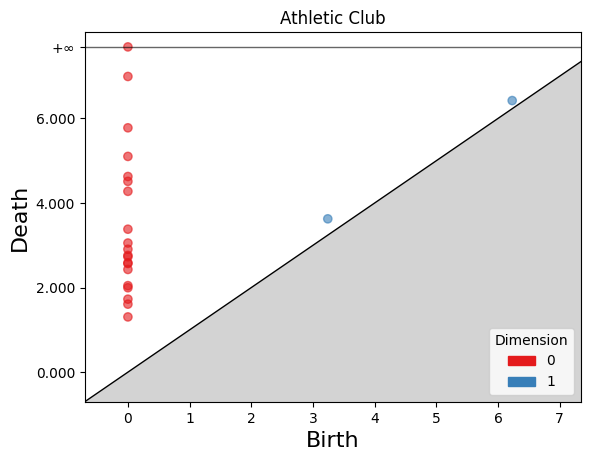

Atlético Madrid
ok


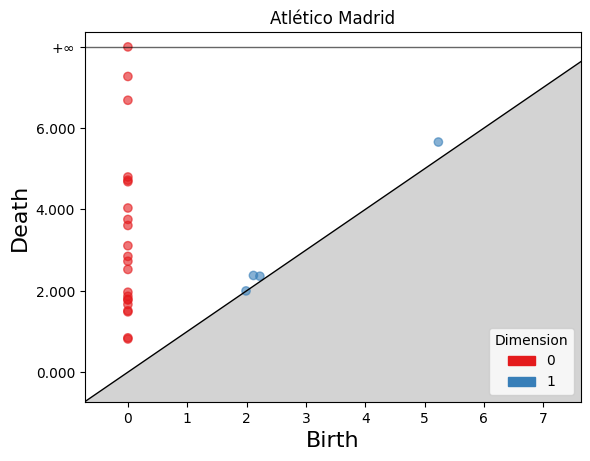

Barcelona
ok


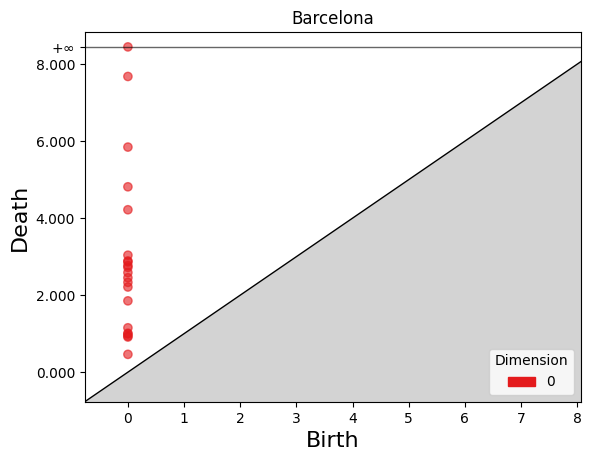

Celta Vigo
ok


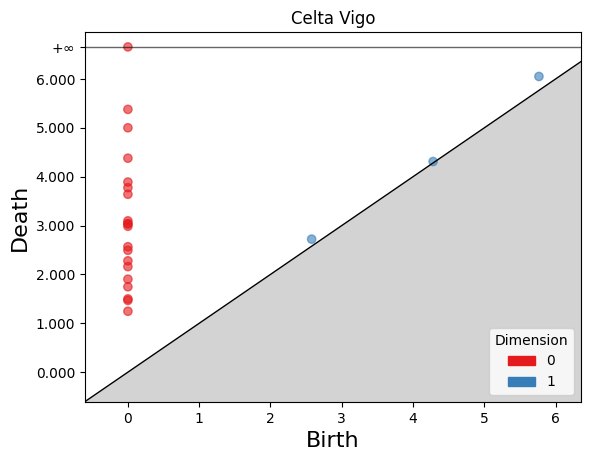

Eibar
ok


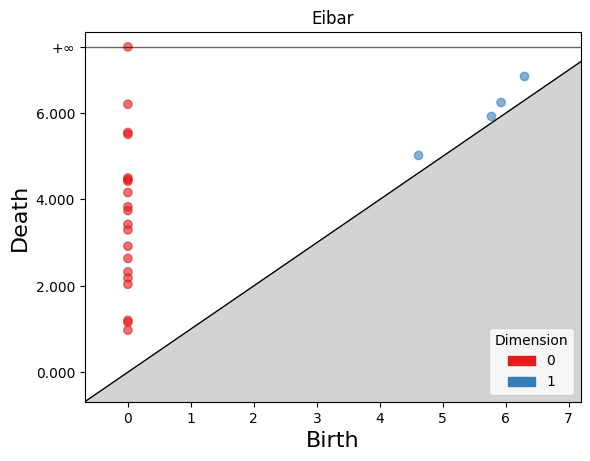

Espanyol
ok


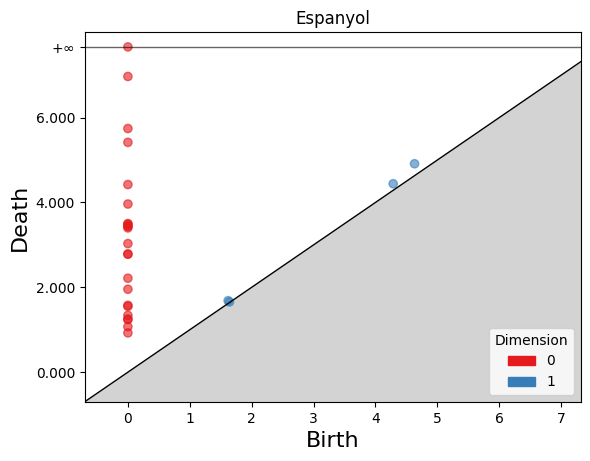

Getafe
ok


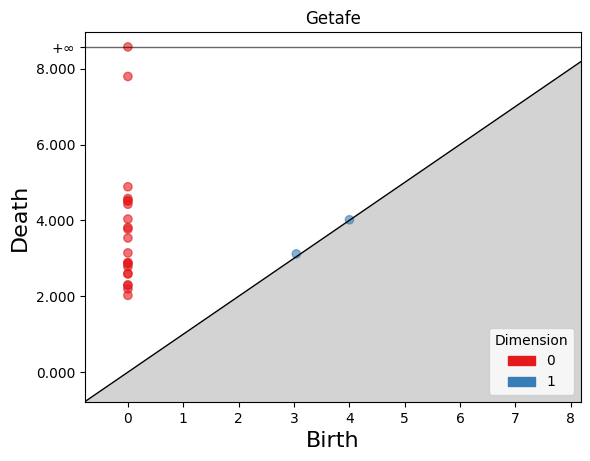

Granada
ok


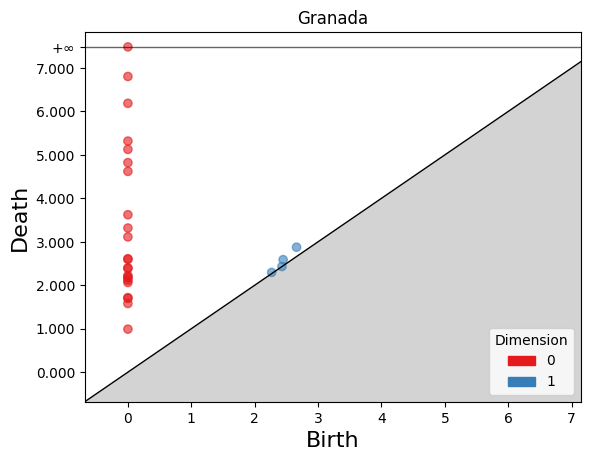

Las Palmas
ok


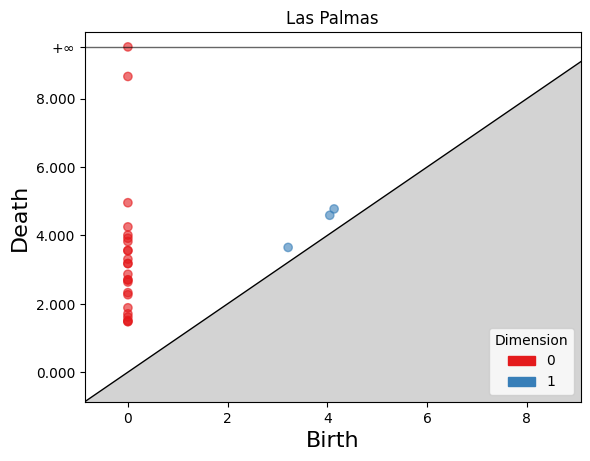

Levante UD
ok


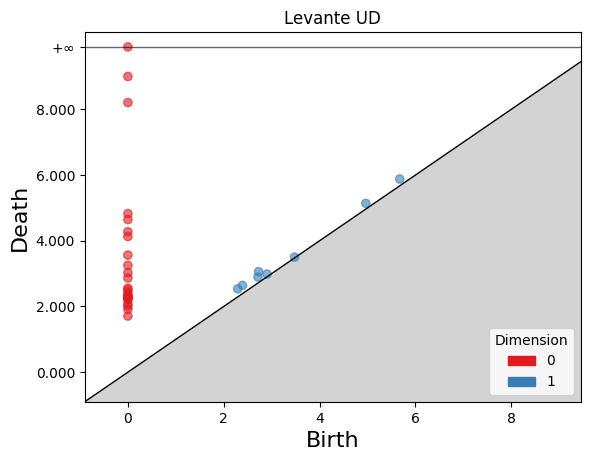

Málaga
ok


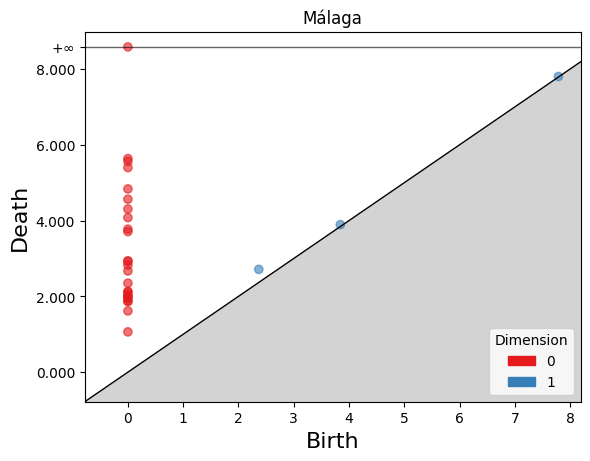

RC Deportivo La Coruña
ok


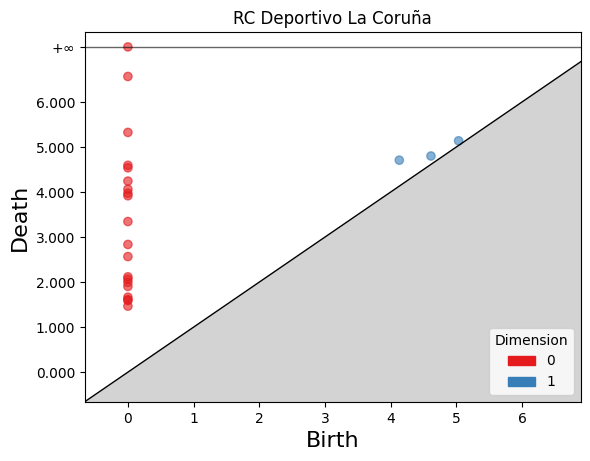

Rayo Vallecano
ok


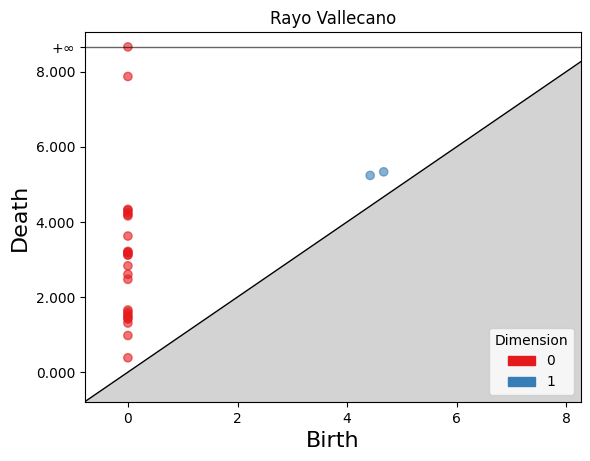

Real Betis
ok


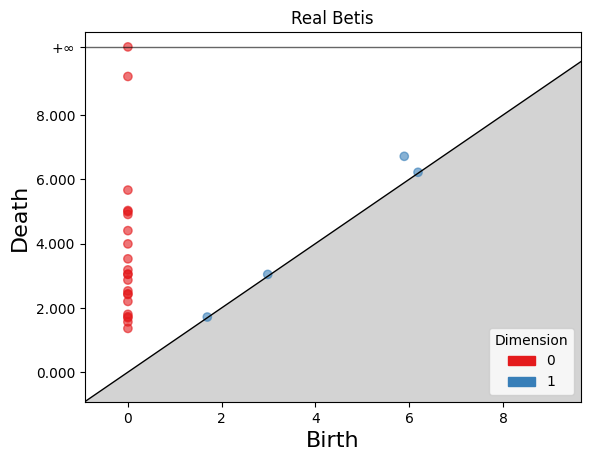

Real Madrid
ok


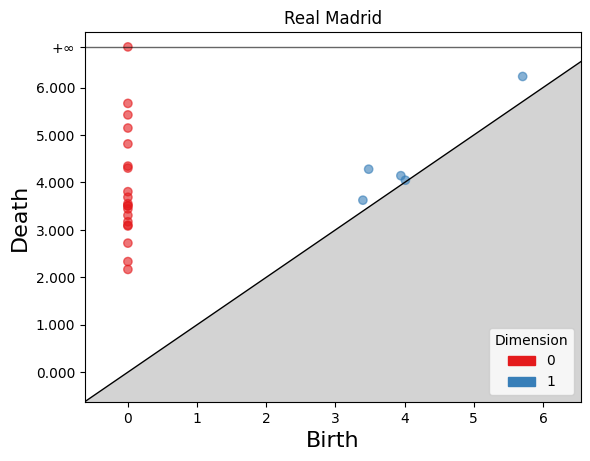

Real Sociedad
ok


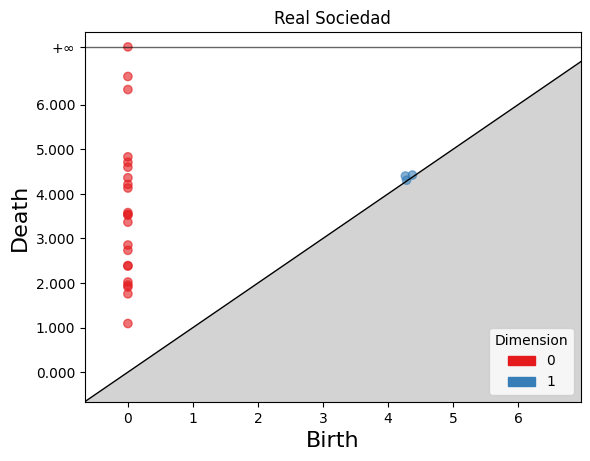

Sevilla
ok


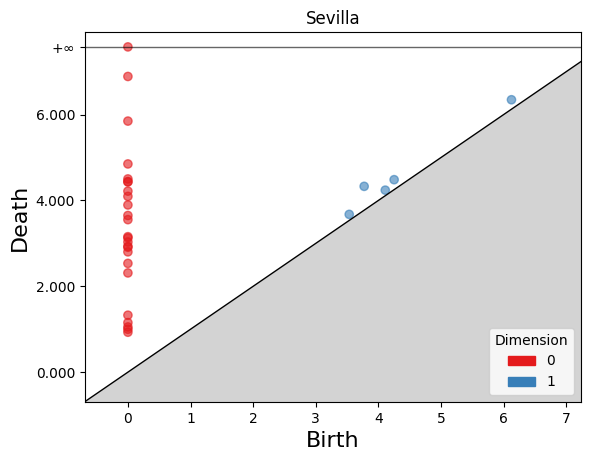

Sporting Gijón
ok


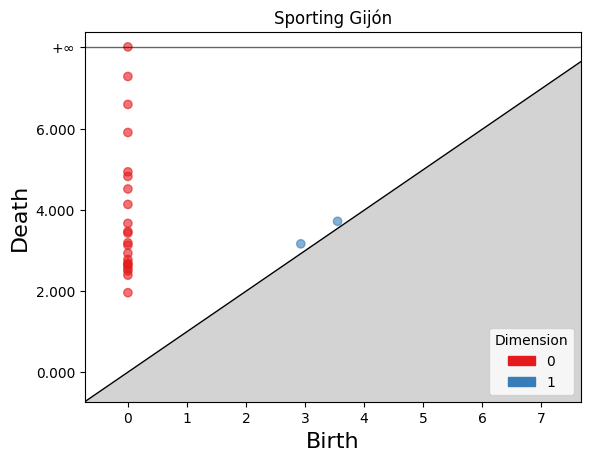

Valencia
ok


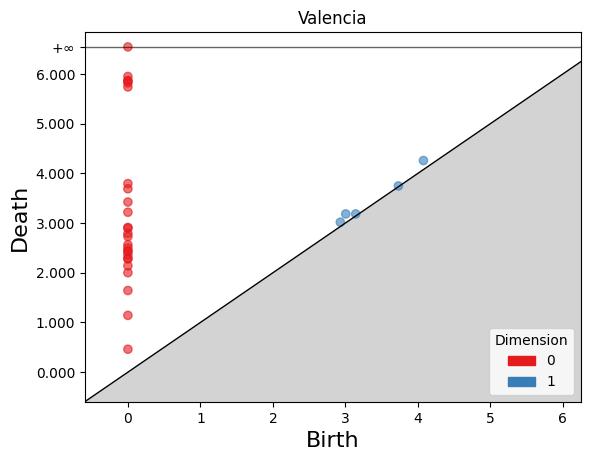

Villarreal
ok


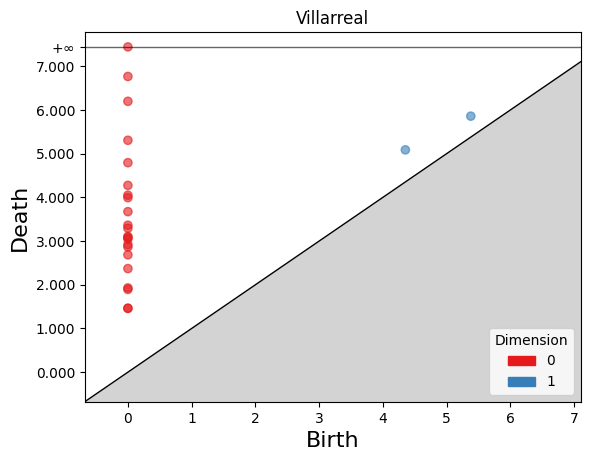

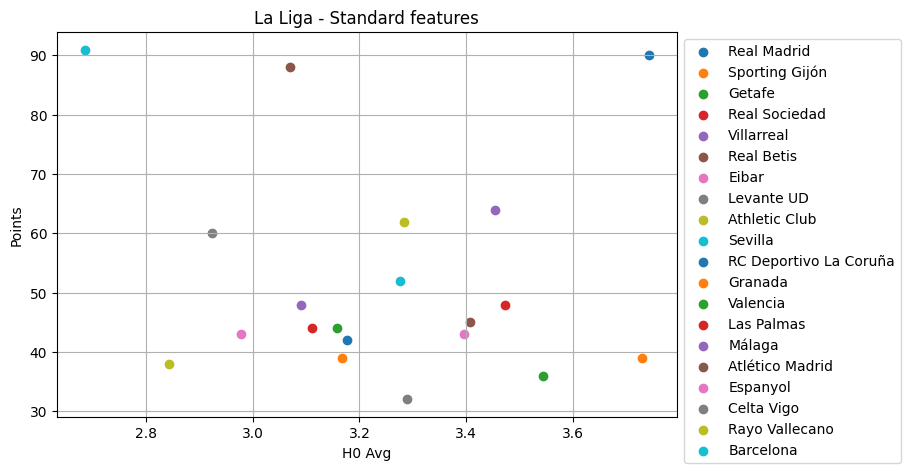

Augsburg
ok


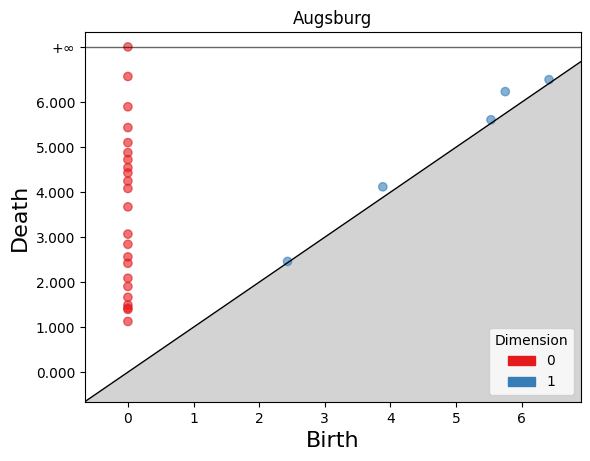

Bayer Leverkusen
ok


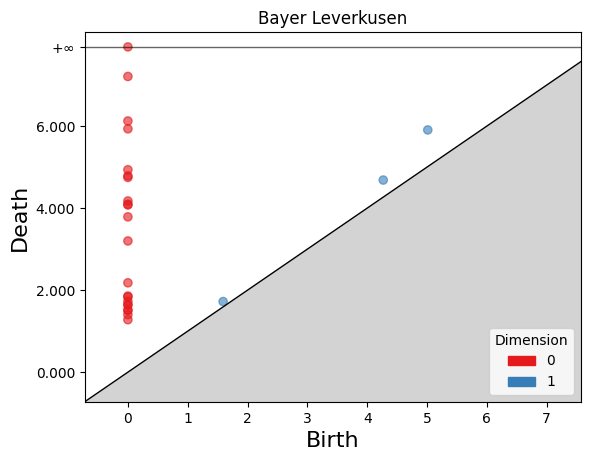

Bayern Munich
ok


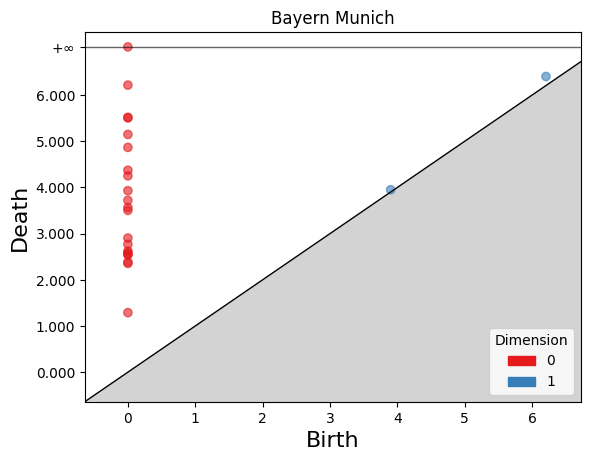

Borussia Dortmund
ok


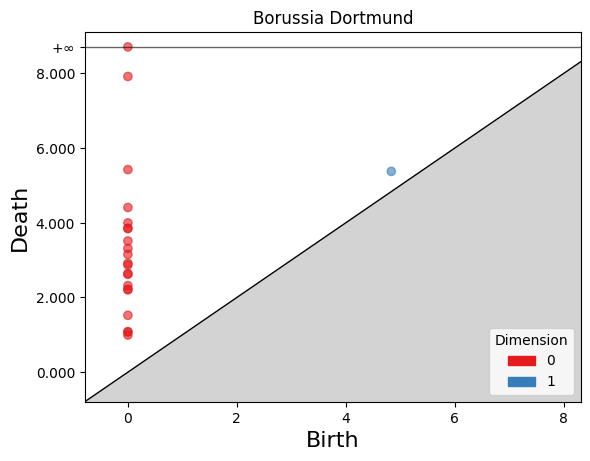

Borussia Mönchengladbach
ok


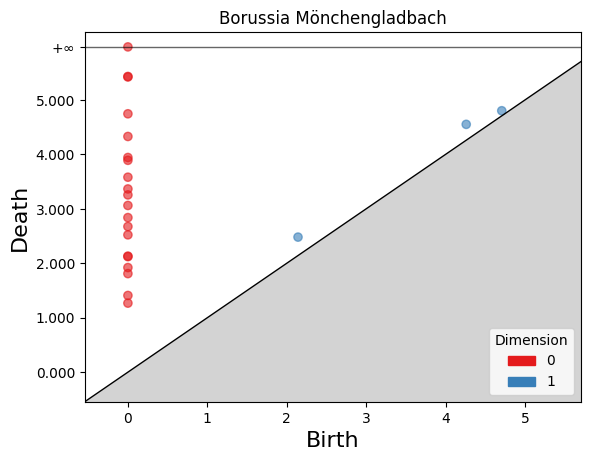

Darmstadt 98
ok


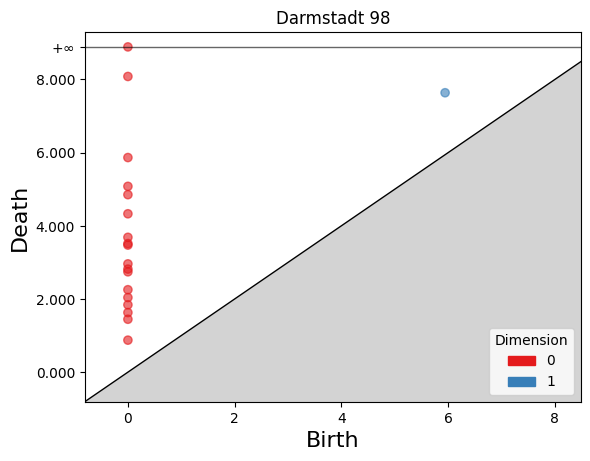

Eintracht Frankfurt
ok


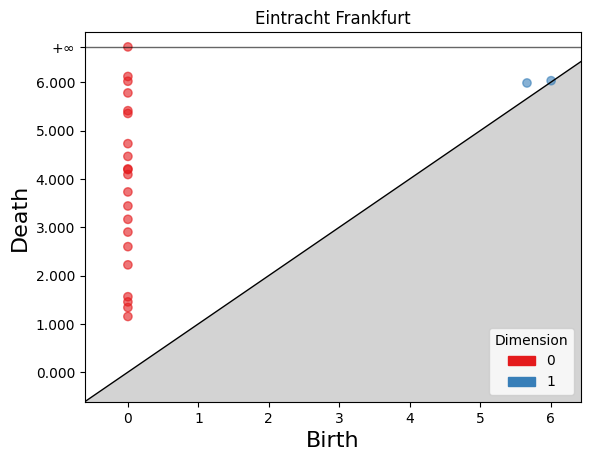

FC Köln
ok


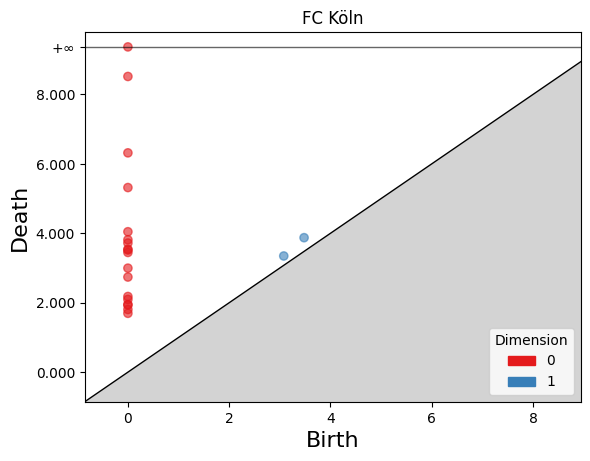

FSV Mainz 05
ok


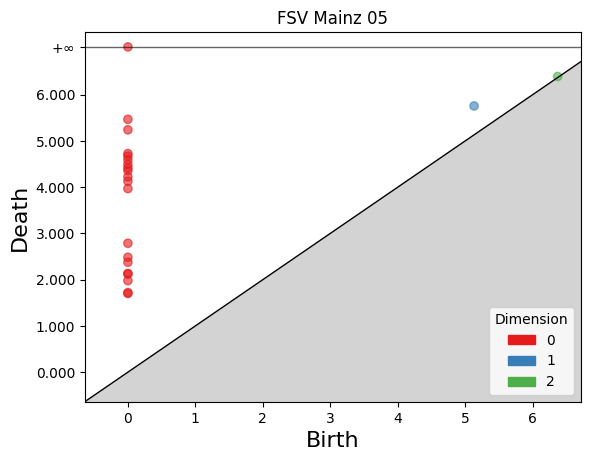

Hamburger SV
ok


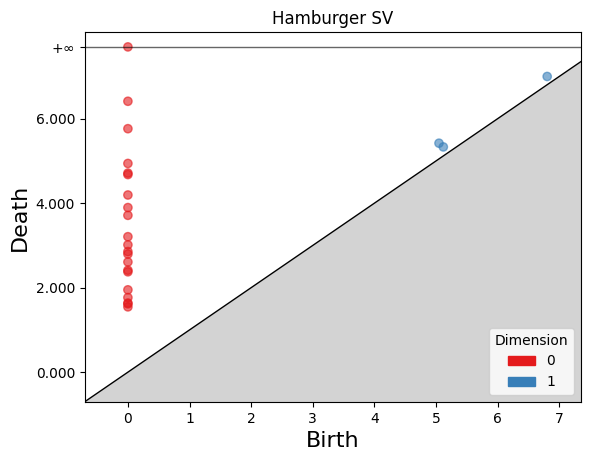

Hannover 96
ok


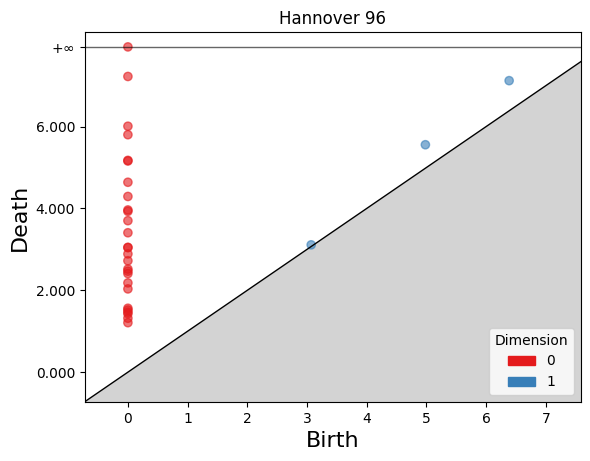

Hertha Berlin
ok


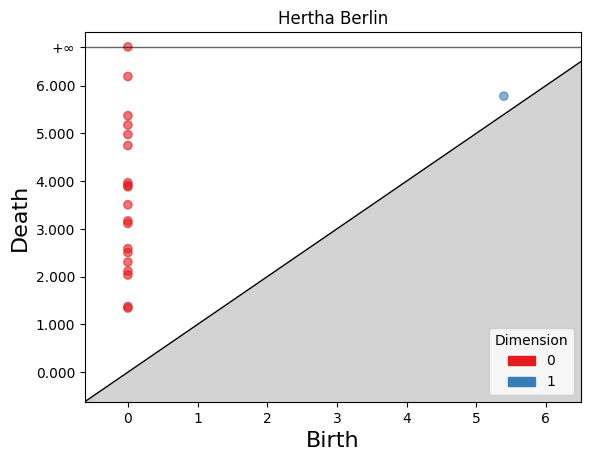

Hoffenheim
ok


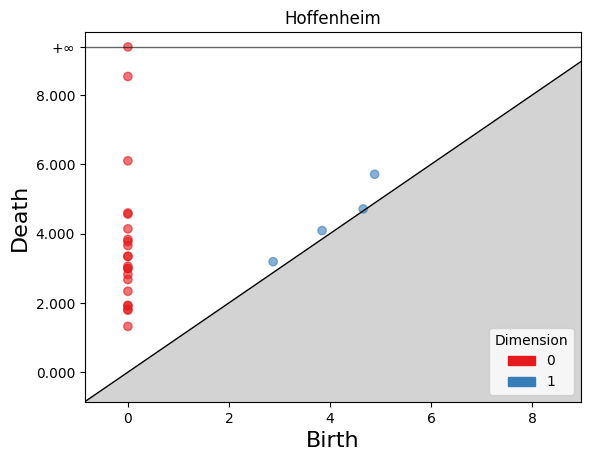

Ingolstadt
ok


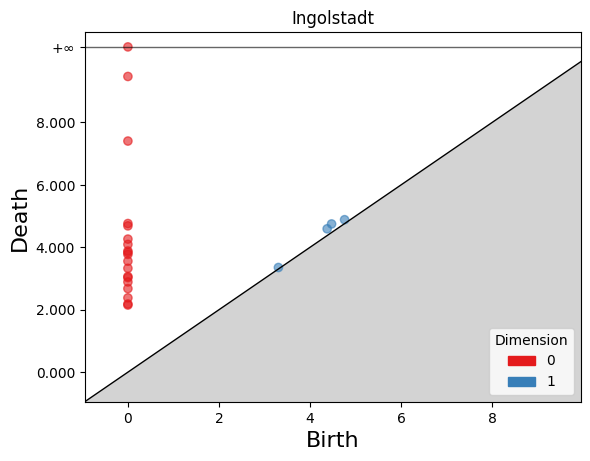

Schalke 04
ok


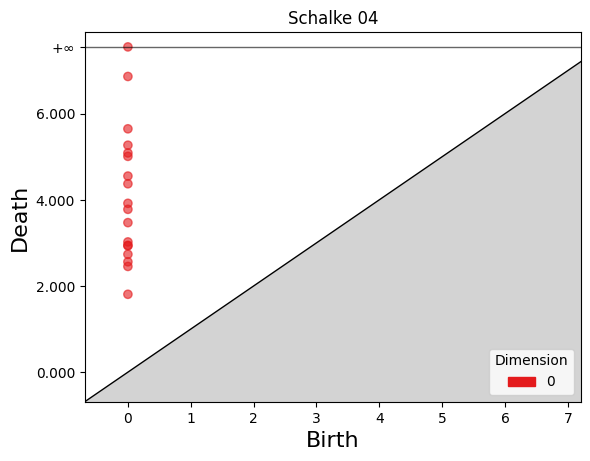

VfB Stuttgart
ok


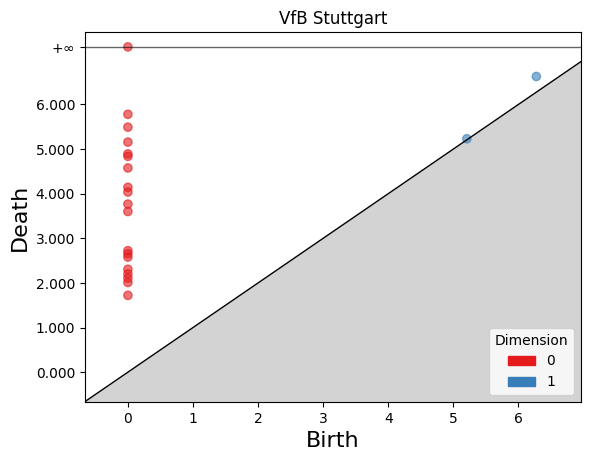

Werder Bremen
ok


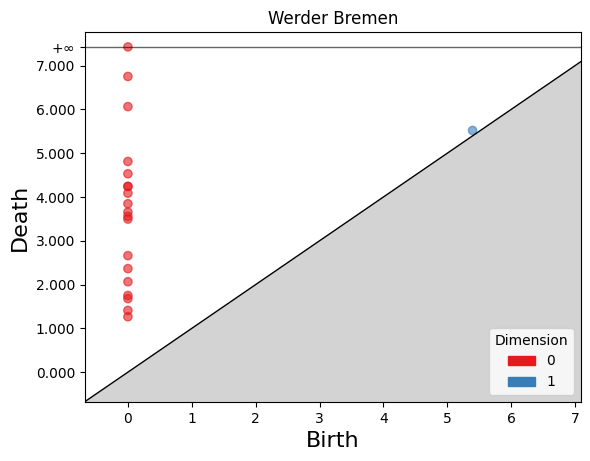

Wolfsburg
ok


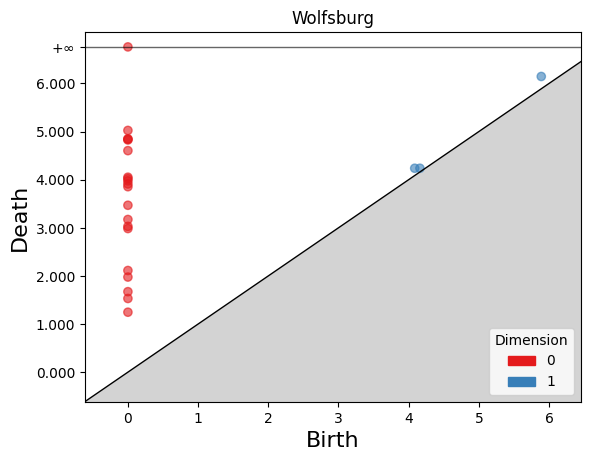

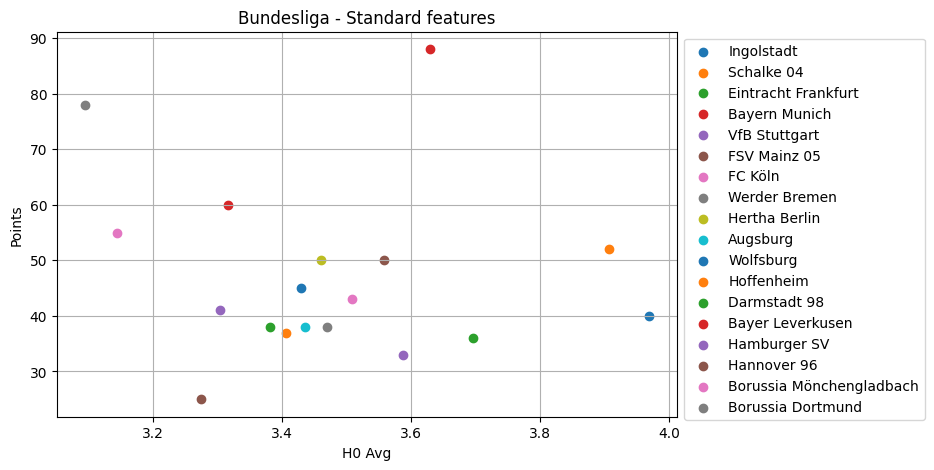

AFC Bournemouth
ok


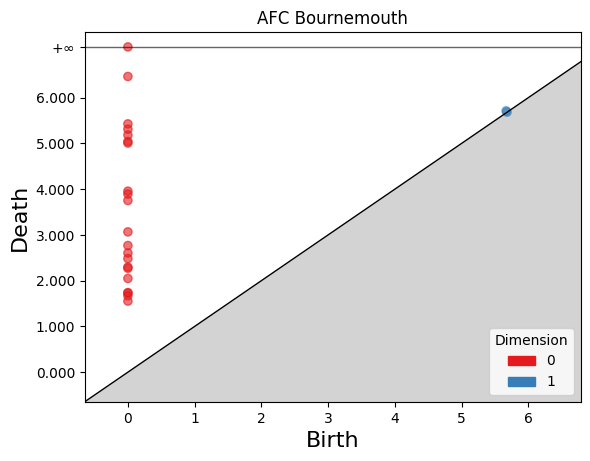

Arsenal
ok


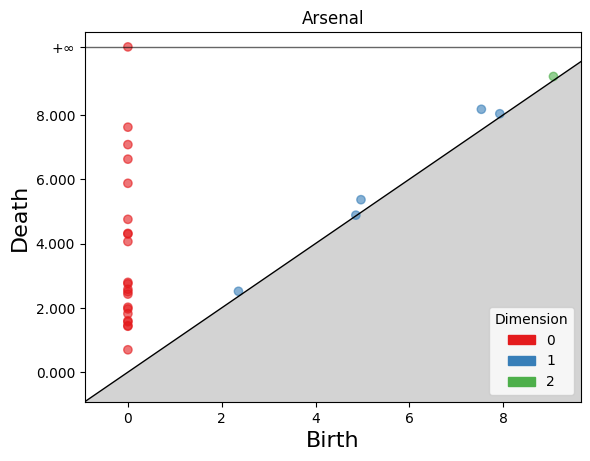

Aston Villa
ok


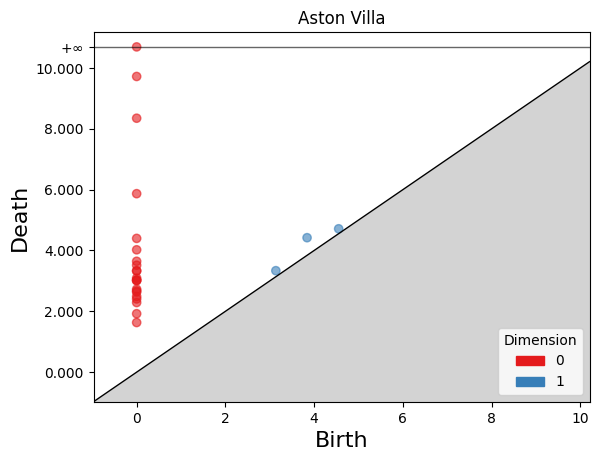

Chelsea
ok


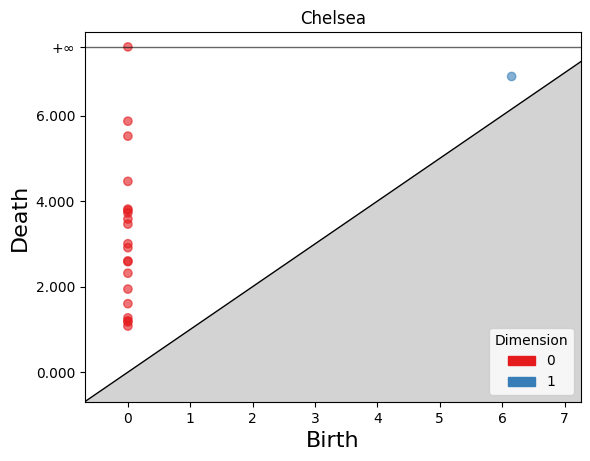

Crystal Palace
ok


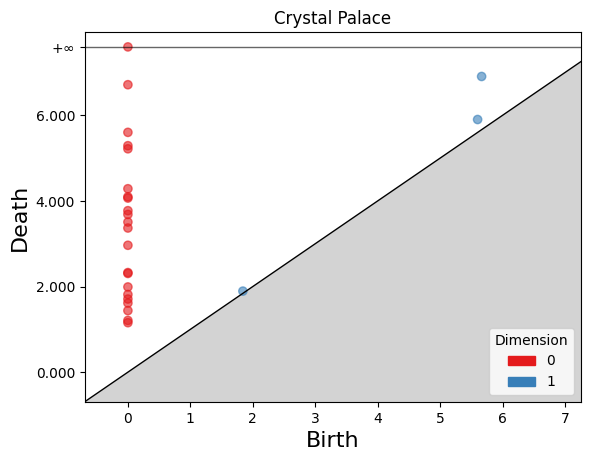

Everton
ok


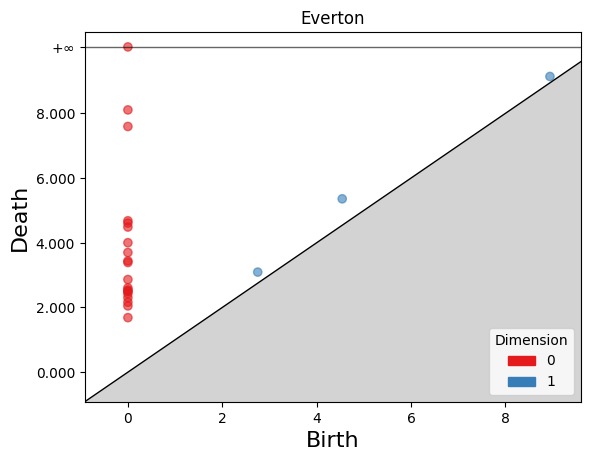

Leicester City
ok


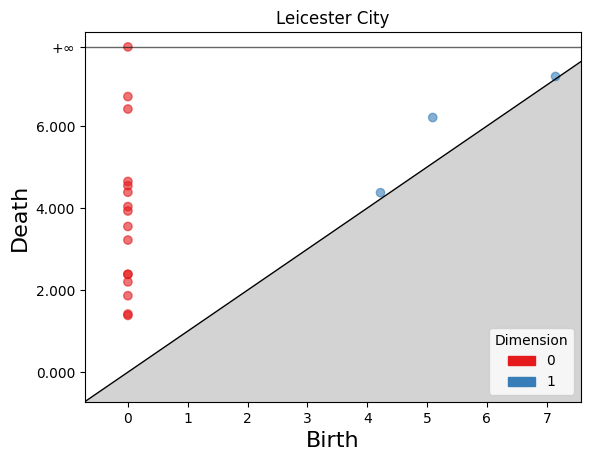

Liverpool
ok


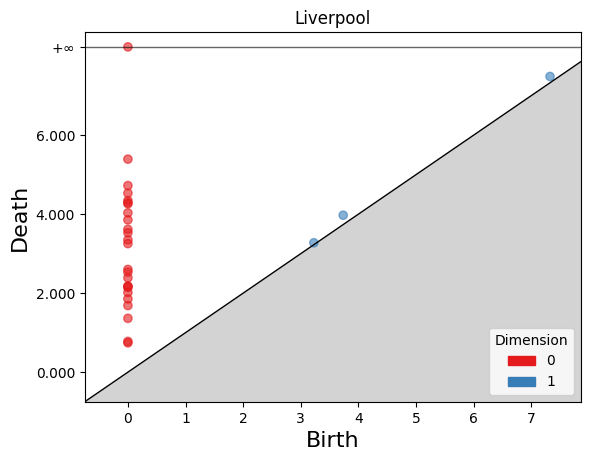

Manchester City
ok


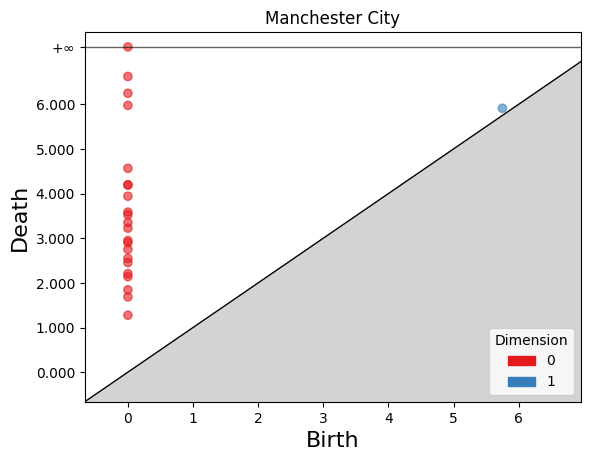

Manchester United
ok


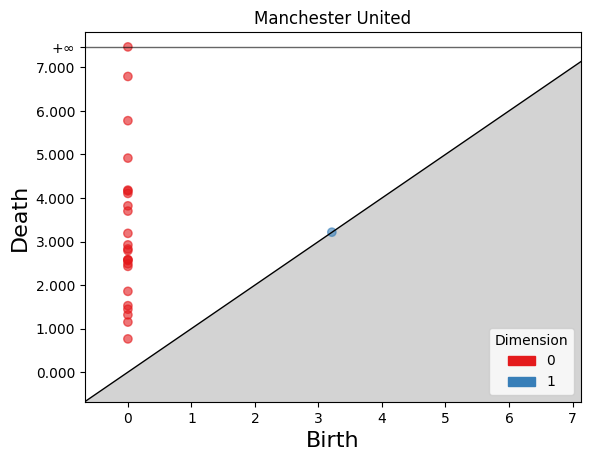

Newcastle United
ok


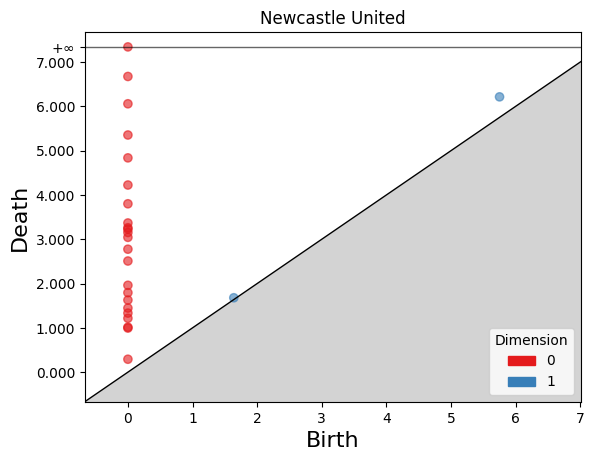

Norwich City
ok


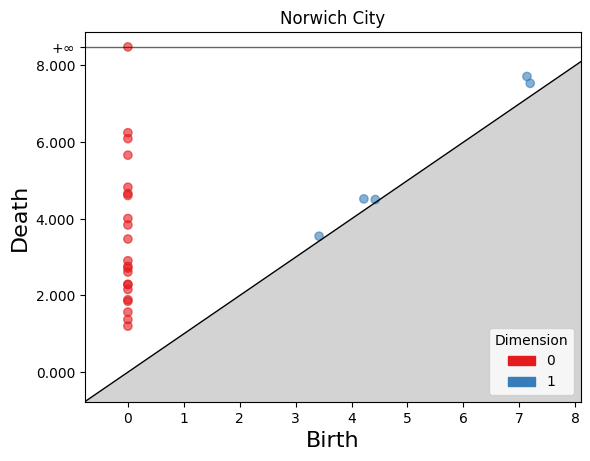

Southampton
ok


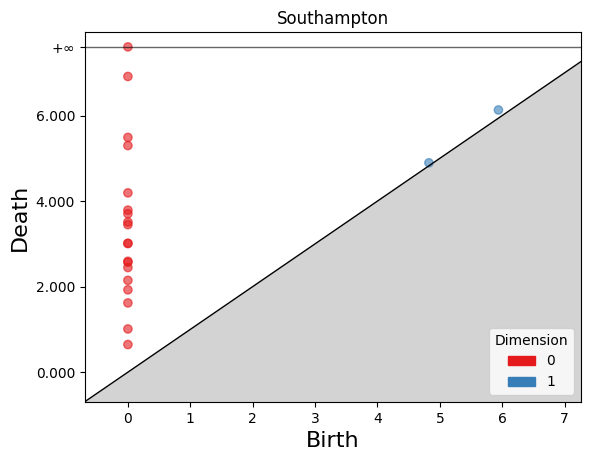

Stoke City
ok


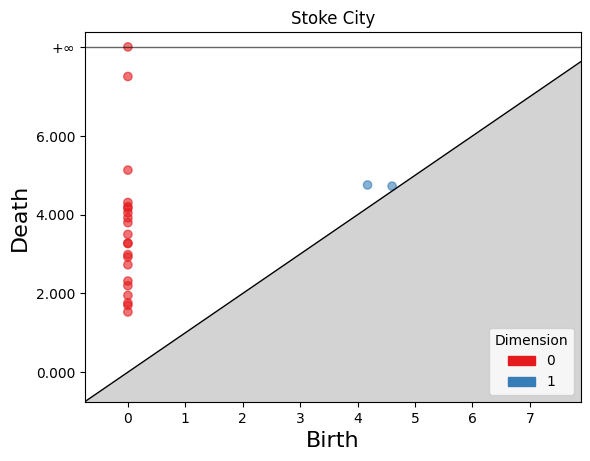

Sunderland
ok


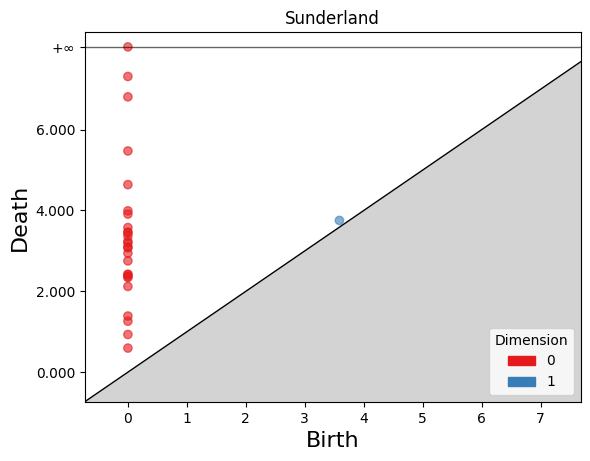

Swansea City
ok


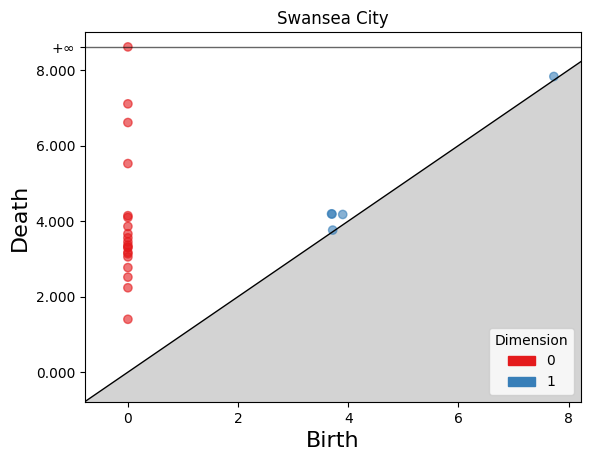

Tottenham Hotspur
ok


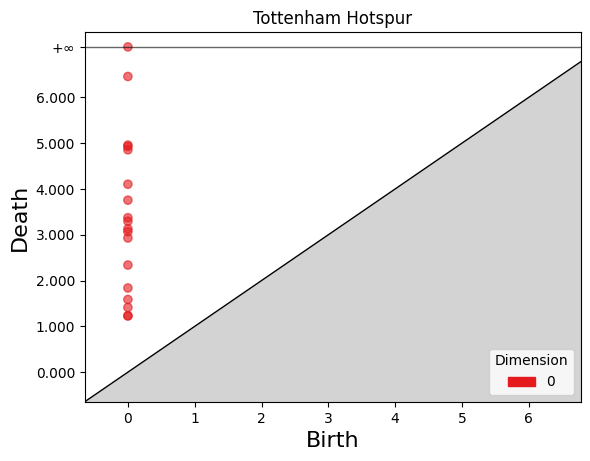

Watford
ok


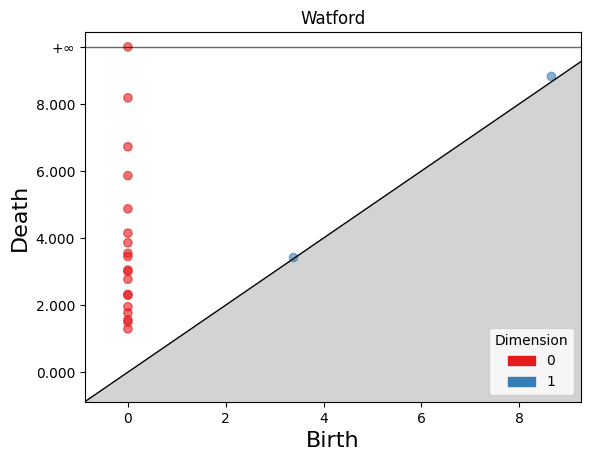

West Bromwich Albion
ok


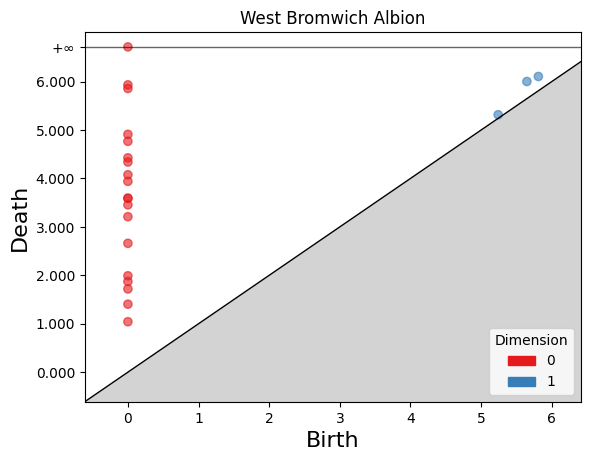

West Ham United
ok


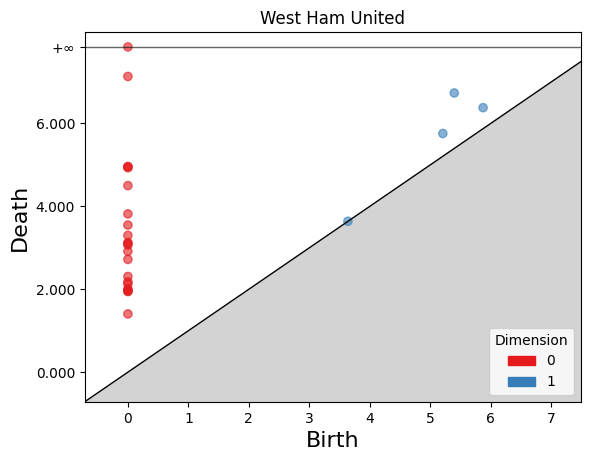

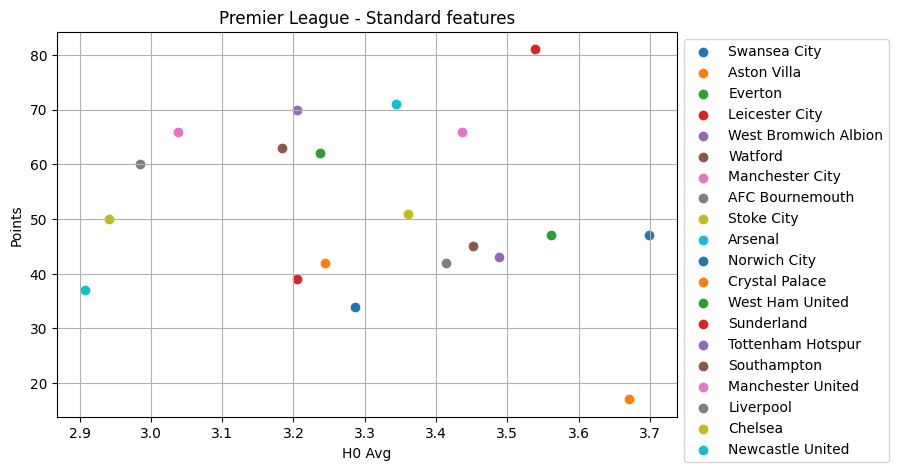

AC Milan
ok


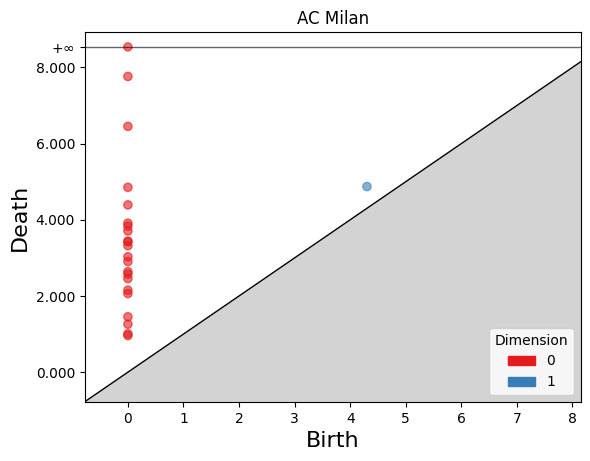

AS Roma
ok


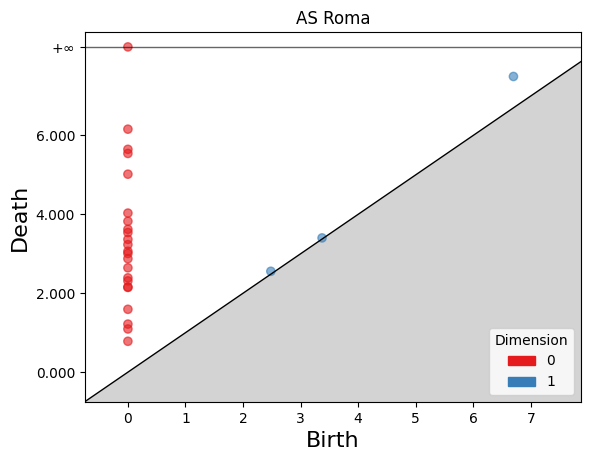

Atalanta
ok


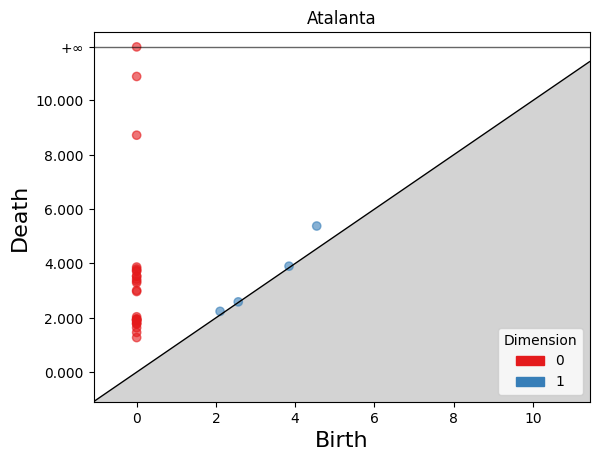

Bologna
ok


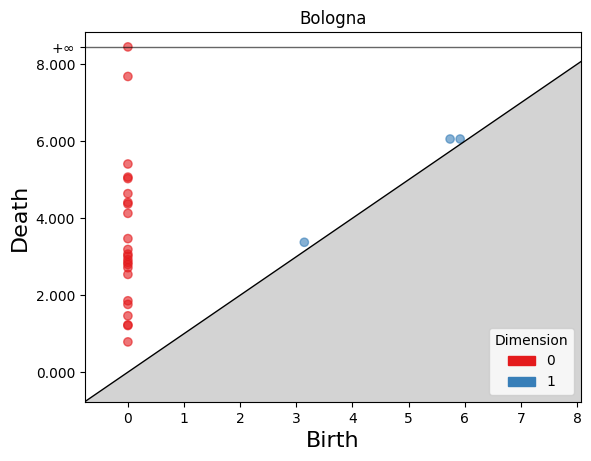

Carpi
ok


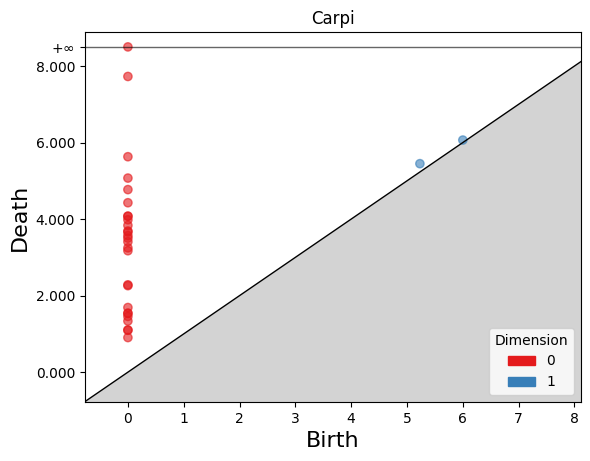

Chievo
ok


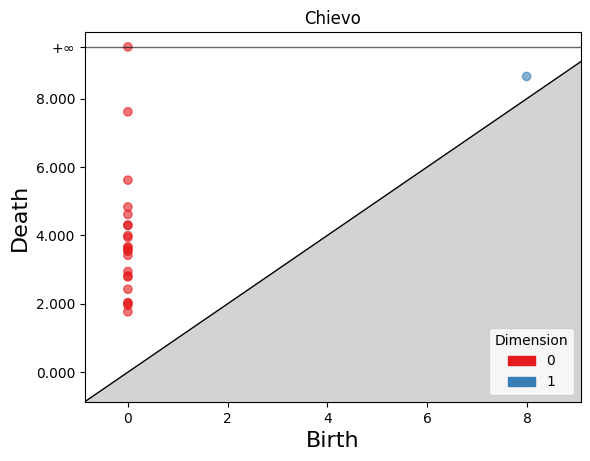

Empoli
ok


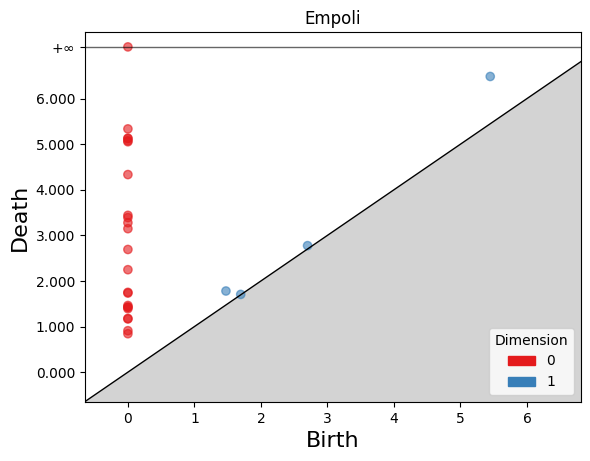

Fiorentina
ok


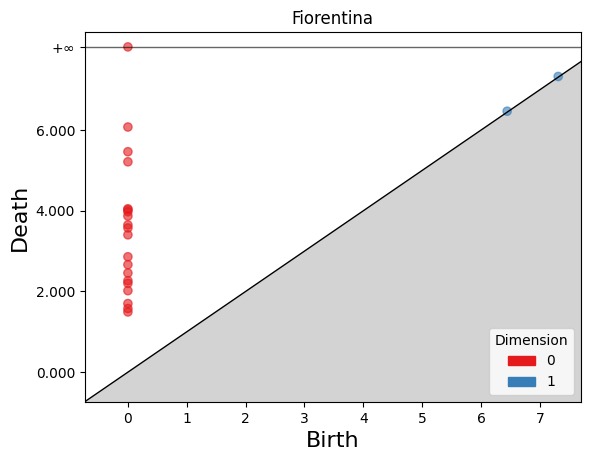

Frosinone
ok


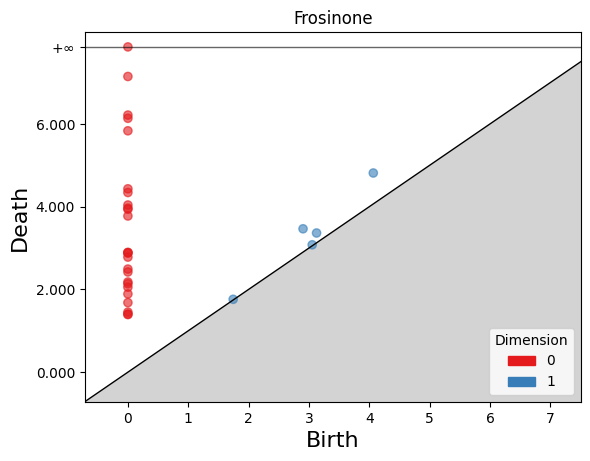

Genoa
ok


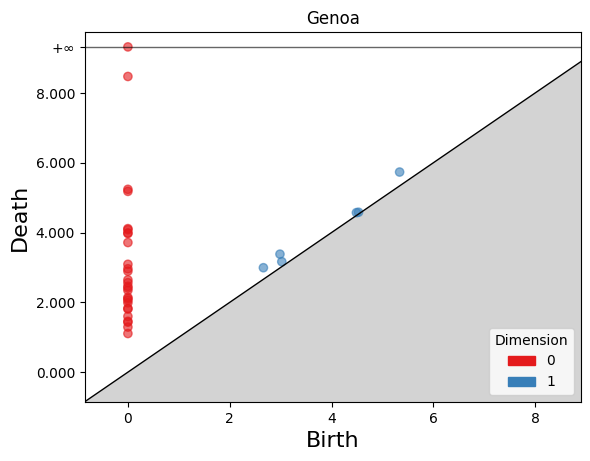

Hellas Verona
ok


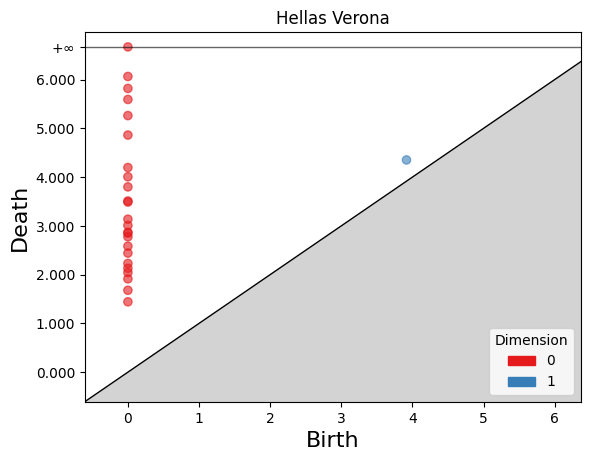

Inter Milan
ok


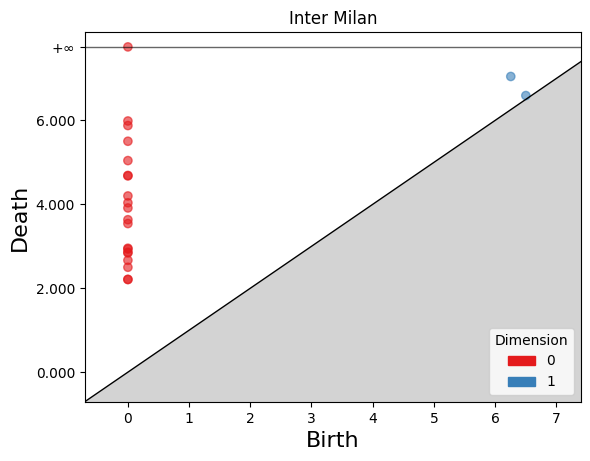

Juventus
ok


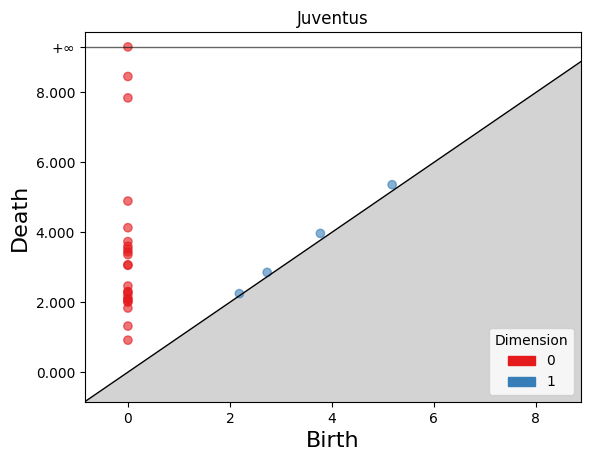

Lazio
ok


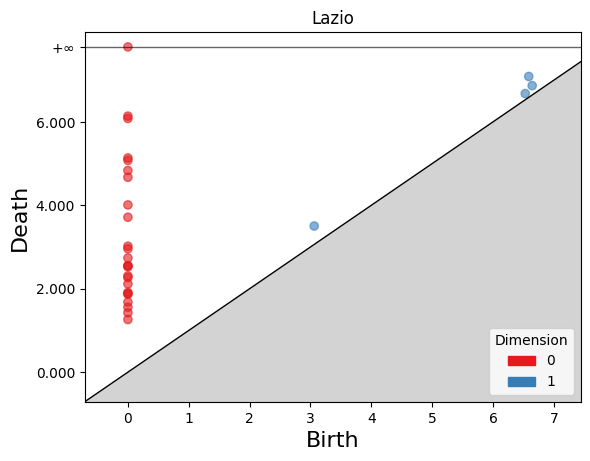

Napoli
ok


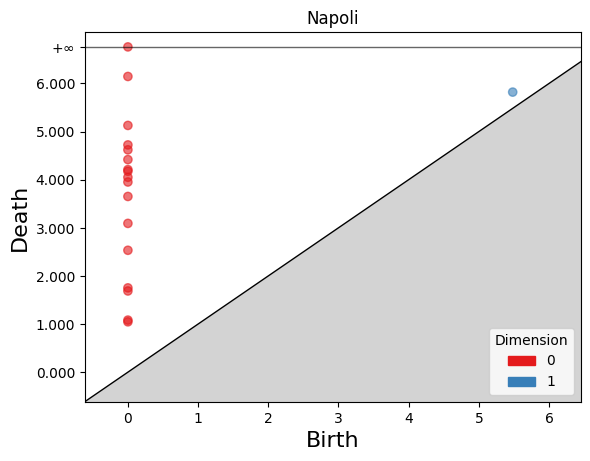

Palermo
ok


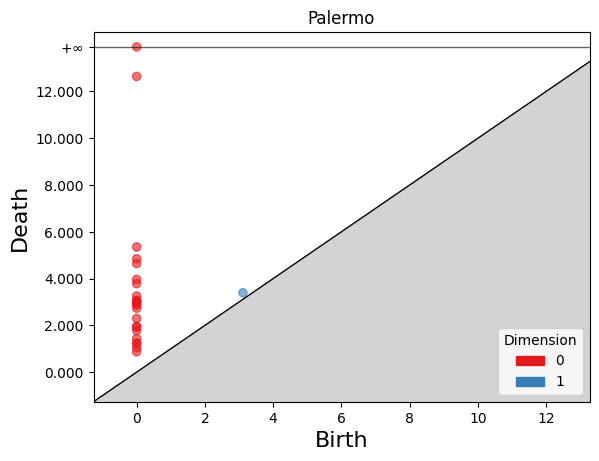

Sampdoria
ok


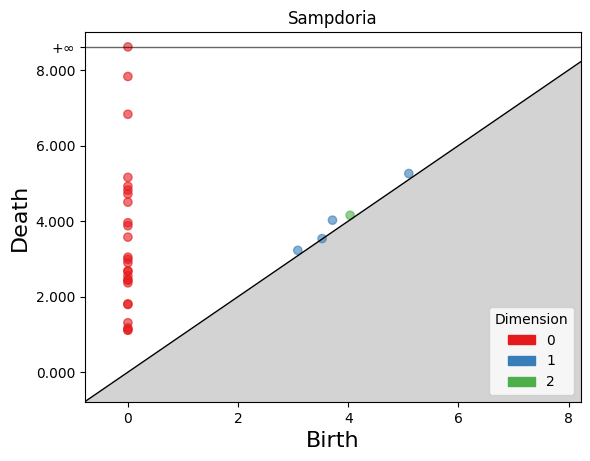

Sassuolo
ok


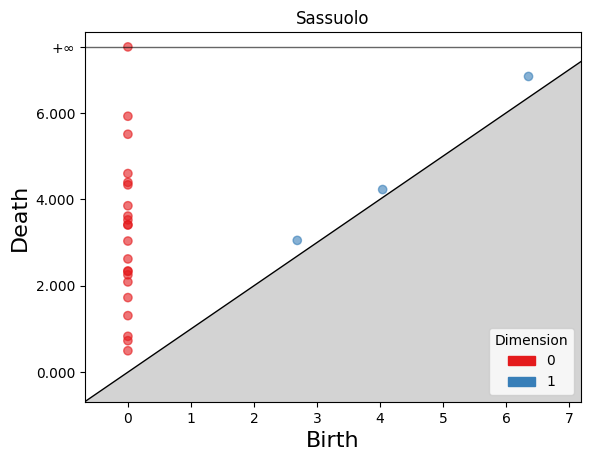

Torino
ok


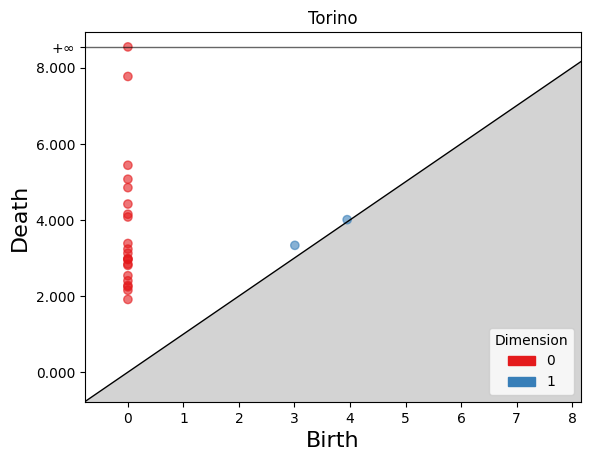

Udinese
ok


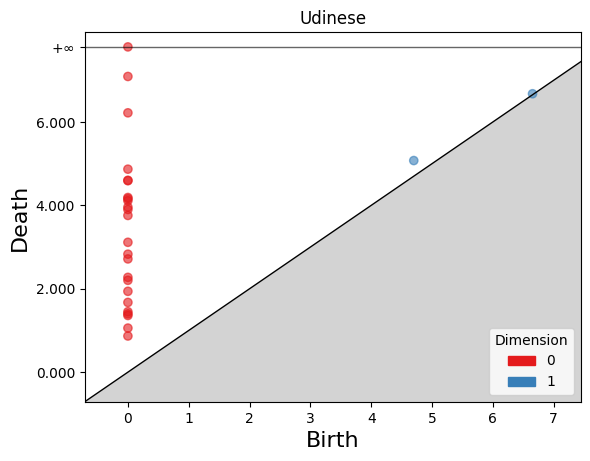

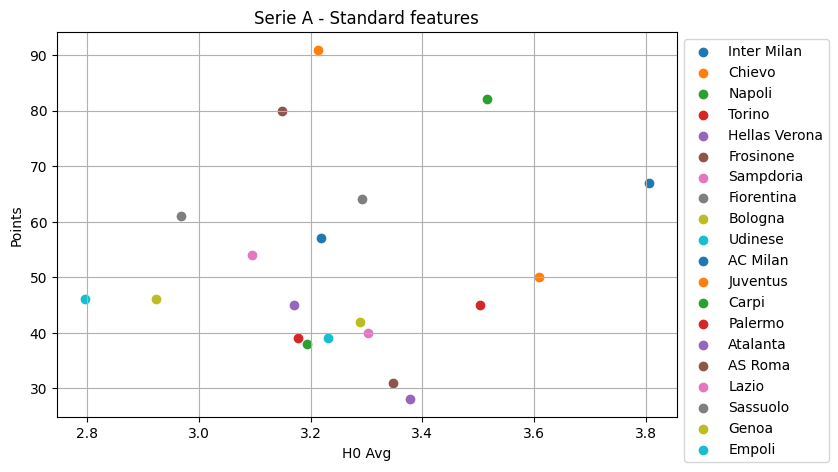

AS Monaco
ok


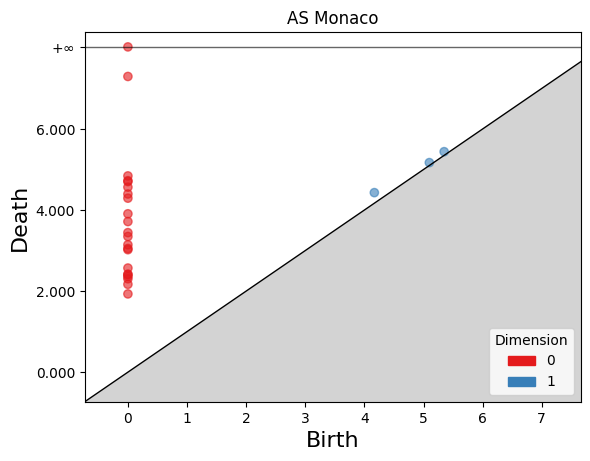

Angers
ok


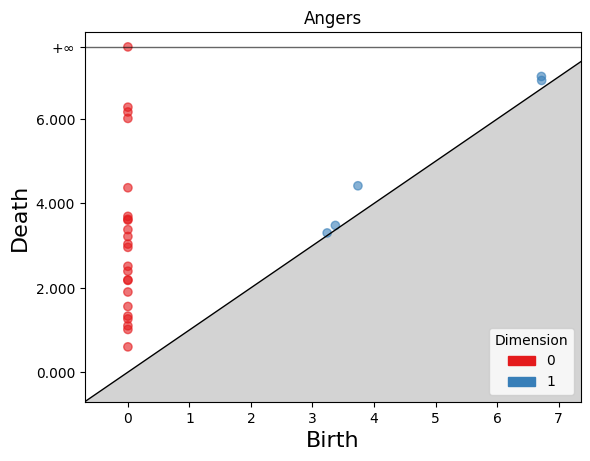

Bastia
ok


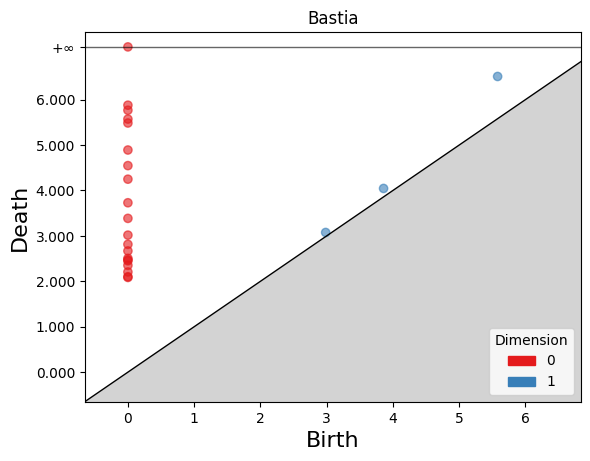

Bordeaux
ok


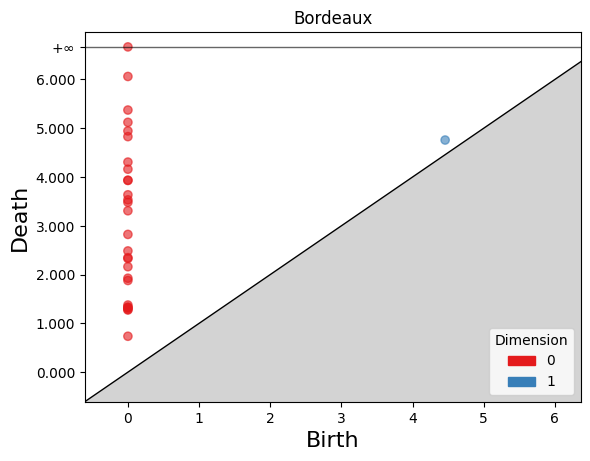

Caen
ok


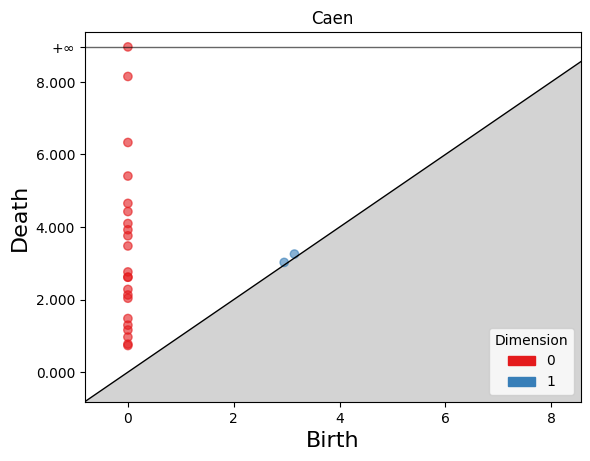

Gazélec Ajaccio
ok


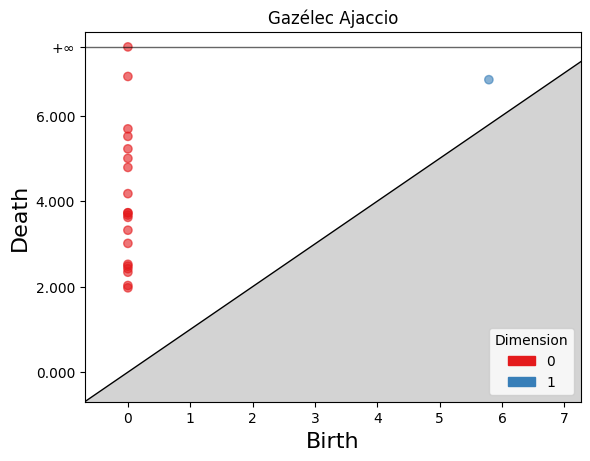

Guingamp
ok


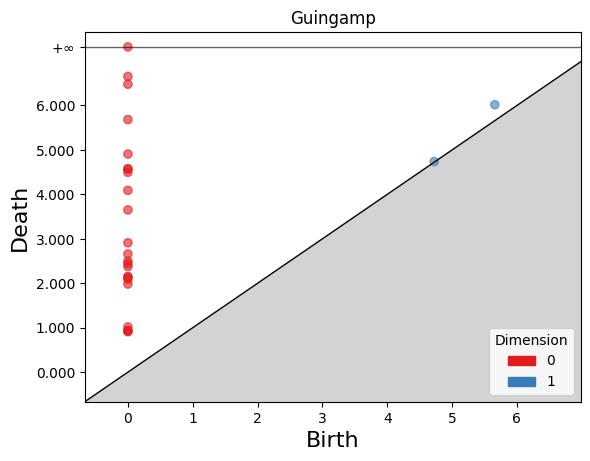

Lille
ok


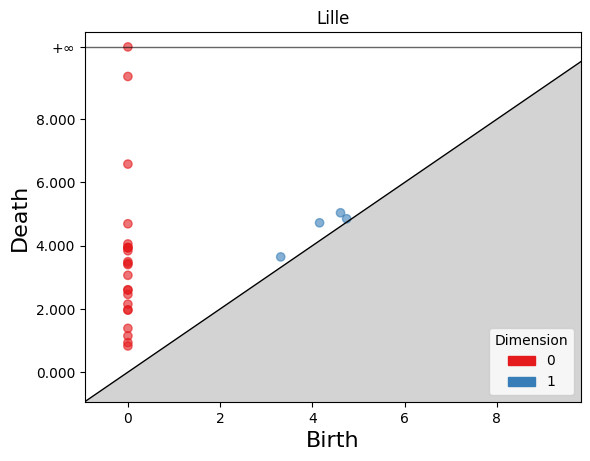

Lorient
ok


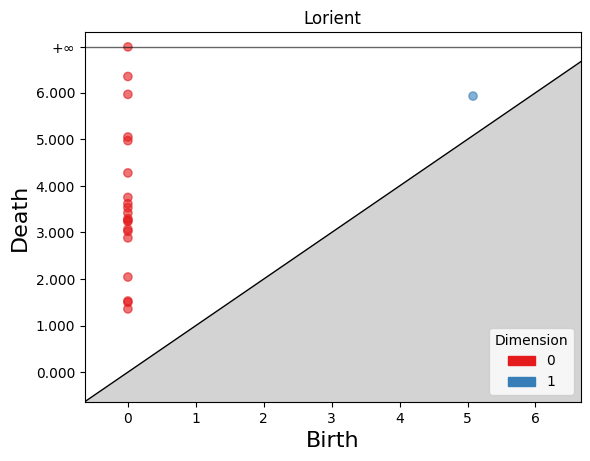

Lyon
ok


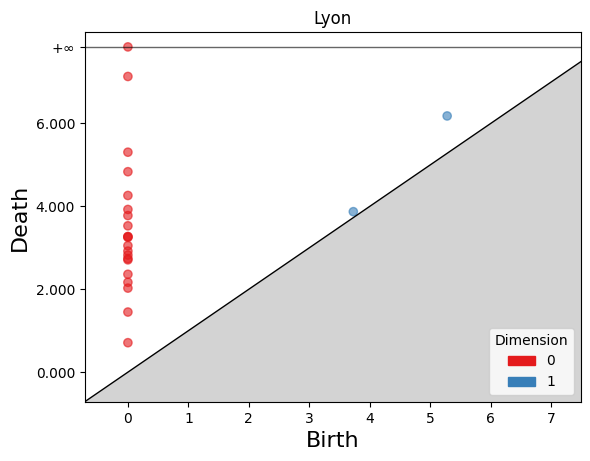

Marseille
ok


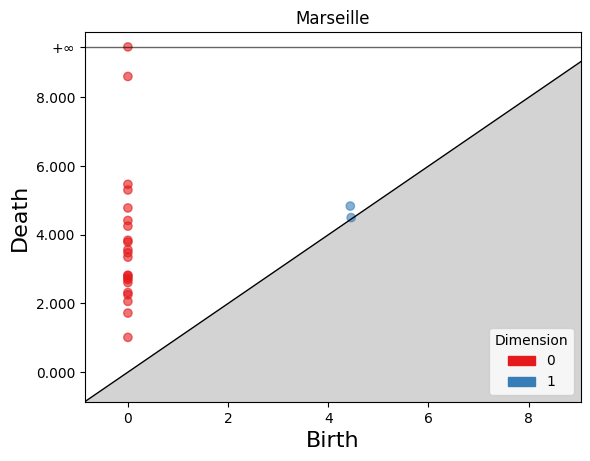

Montpellier
ok


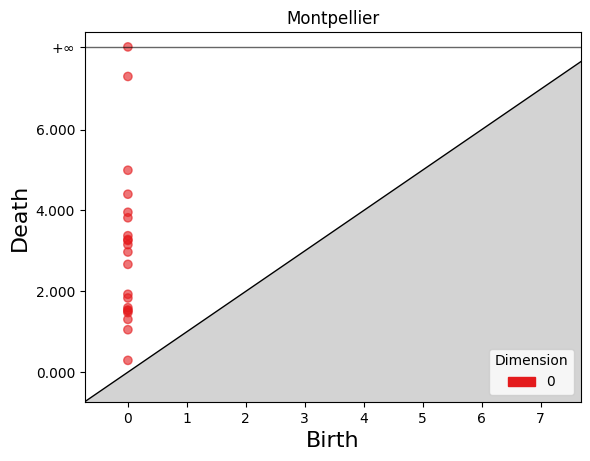

Nantes
ok


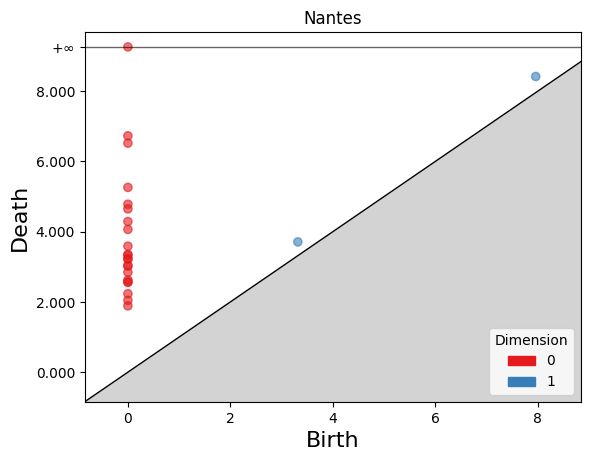

OGC Nice
ok


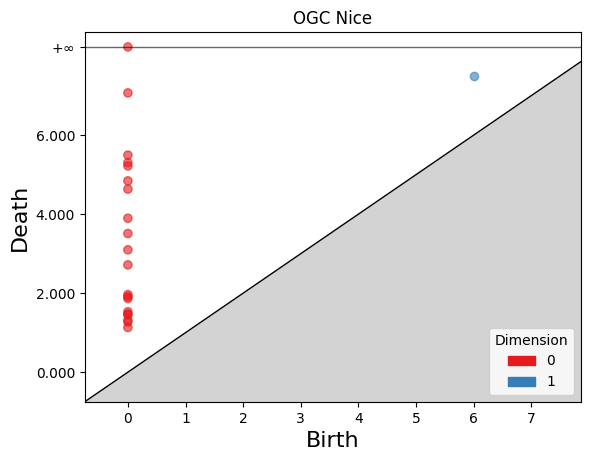

Paris Saint-Germain
ok


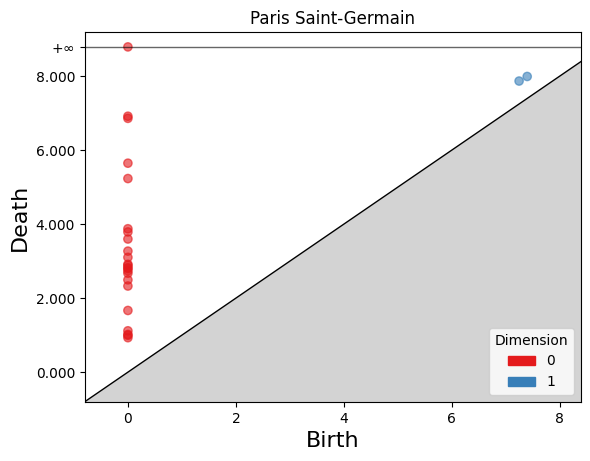

Rennes
ok


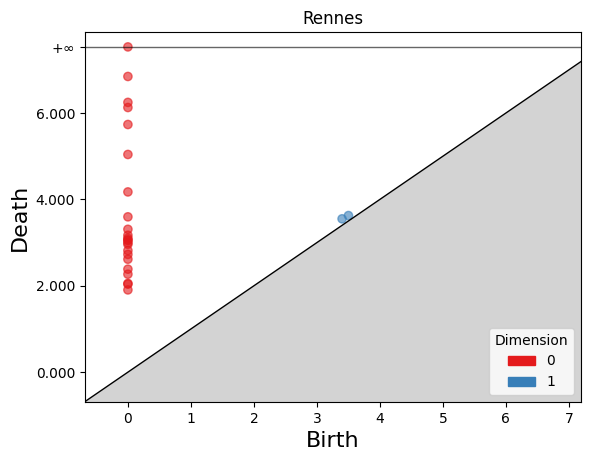

Saint-Étienne
ok


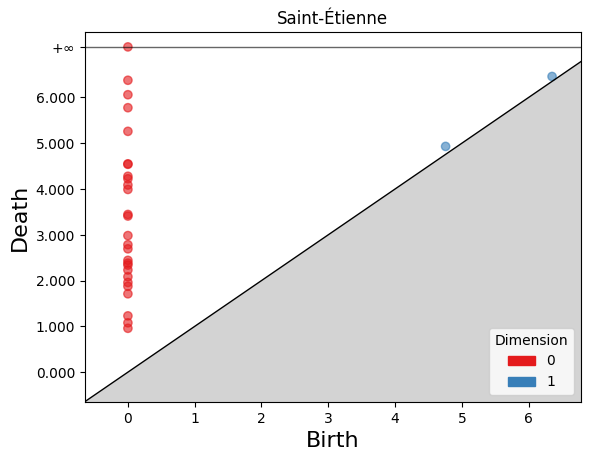

Stade de Reims
ok


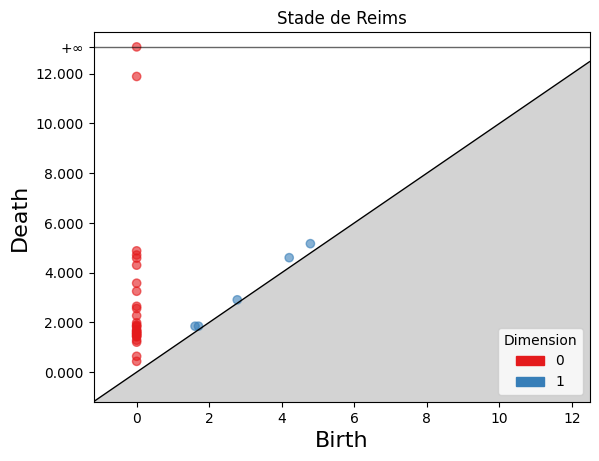

Toulouse
ok


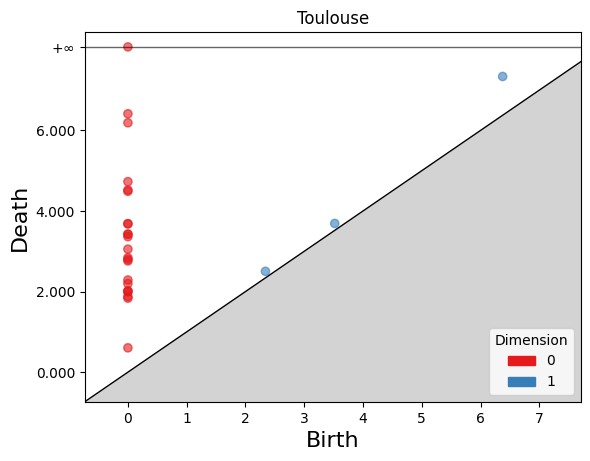

Troyes
ok


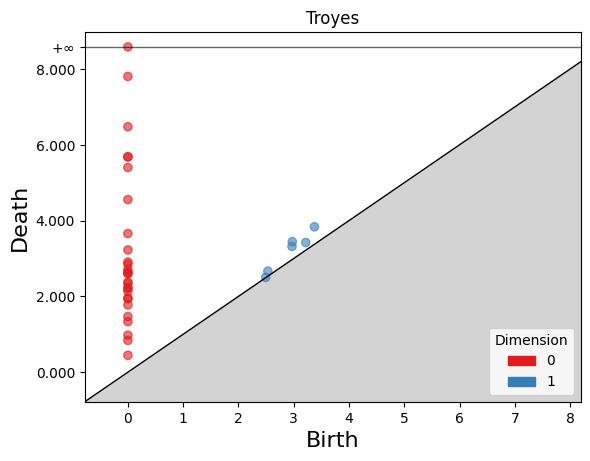

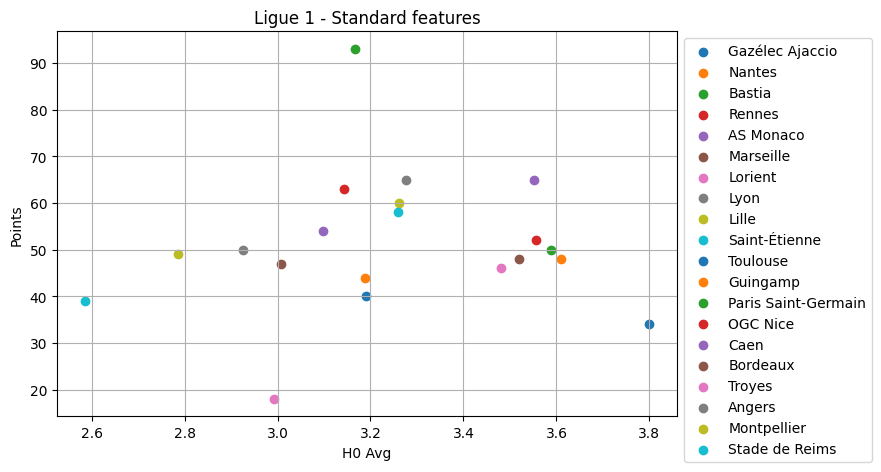

In [2]:
# PERZISZTENCIA DIAGRAMS NORMALISED WITH StandardScalar
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsbombpy import sb
import re
import pandas as pd
import os
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)
# (11, "La Liga", "La_Liga"), (9, "Bundesliga", "Bundesliga"),(2, "Premier League", "Premier_League"), (12, "Serie A", "Serie_A"),  (7, "Ligue 1", "Ligue_1") ,
top5 = [(11, "La Liga", "La_Liga"), (9, "Bundesliga", "Bundesliga"),(2, "Premier League", "Premier_League"), (12, "Serie A", "Serie_A"),  (7, "Ligue 1", "Ligue_1")]
all_fetaures = ['player_id', 'player_name', 'minutes_played', 'shot_count',
       'goal_count', 'xG', 'on_target', 'pass_count', 'successfull_pass_count',
       'assists', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles',
       'long_carries', 'foul_committed_count', 'fouls_suffered_count',
       'penalites_won', 'duel_count', 'won_duels', 'ball_recovery_count',
       'dispossessed_count', 'clearance_count', 'interception_count',
       'block_count', 'tackle_count', 'successful_tackles', 'pressure_count']

countable_features = ['shot_count',
       'goal_count', 'xG', 'on_target', 'pass_count', 'successfull_pass_count',
       'assists', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles',
       'long_carries', 'foul_committed_count', 'fouls_suffered_count',
       'penalites_won', 'duel_count', 'won_duels', 'ball_recovery_count',
       'dispossessed_count', 'clearance_count', 'interception_count',
       'block_count', 'tackle_count', 'successful_tackles', 'pressure_count']

attackingStats = ['shot_count', 'goal_count', 'xG', 'on_target', 'key_passes', 'xA', 'dribble_count', 'successfull_dribbles'];

possessionStats = ['pass_count', 'successfull_pass_count'];

defensiveStats = ['duel_count', 'won_duels', 'tackle_count', 'successful_tackles', 'pressure_count', 'ball_recovery_count', 'interception_count'];

physicalStats = ['foul_committed_count', 'fouls_suffered_count'];

selected_features = countable_features

selected_features_avg = []
player_count = 0

diagrams = []  
team_labels = []  


for (comp_id, comp_name, comp_safe_name) in top5:
    
    matches = sb.matches(competition_id=comp_id, season_id=27)
    teams = sorted(list(set(matches['home_team'].tolist())))

    output_dir = f'{comp_safe_name}-all_features-standard_scalar'
    
    os.makedirs(output_dir, exist_ok=True)
    H0_avg = []
    for team in teams:
        print(team)
        team_matches = matches[(matches['home_team'] == team) | (matches['away_team'] == team)]
        team_home_wins = team_matches[(team_matches['home_team'] == team) & (team_matches['home_score'] > team_matches['away_score'])]
        team_away_wins = team_matches[(team_matches['away_team'] == team) & (team_matches['away_score'] > team_matches['home_score'])]
        team_draws = team_matches[team_matches['home_score'] == team_matches['away_score']]
        
        team_points = (team_home_wins.shape[0] + team_away_wins.shape[0])*3 + team_draws.shape[0]
        
        
        safe_team = re.sub(r'[^\w\s]', '', team).replace(" ", "_")
        input_dir = f"{comp_safe_name}_2015-2016/{safe_team}"
        
        df = pd.read_csv(f"{input_dir}/{safe_team}_season_stats.csv")  
    
        df = df[df['minutes_played'] >= 300]
        data_TDA = df[selected_features].to_numpy()
        
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_TDA)
        
        rips_complex = gd.RipsComplex(points=data_scaled, max_edge_length=1000.0)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=4)
        
        diag = simplex_tree.persistence()
        
        persistence_intervals = simplex_tree.persistence_intervals_in_dimension(0)

        diagrams.append(persistence_intervals)  
        team_labels.append(team)
        
        H0_sum = 0
        i = 0
        
        for H0 in persistence_intervals:
            if H0[1] != np.inf:
                H0_sum += H0[1]
                i = i+1
        
        H0_avg.append((team, H0_sum / i if i != 0 else 0, team_points))

        gd.plot_persistence_diagram(diag)
        plt.title(team)
        # plt.savefig(f'{output_dir}/{safe_team}_persistence_diagram-all_features-standard_scalar.pdf', format="pdf", bbox_inches="tight")
        print("ok")
        # gd.plot_persistence_barcode(diag)
        # plt.title(team)
        plt.show()
        
    H0_avg.sort(key=lambda x: x[1], reverse=True)
    fig, ax = plt.subplots(figsize=(8, 5))

    for team in H0_avg:
        ax.scatter(team[1], team[2], label=team[0])  # X = H0 atlag, Y = szerzett pontok
        
    ax.set_xlabel("H0 Avg")
    ax.set_ylabel("Points")
    ax.set_title(f'{comp_name} - Standard features')
    plt.grid(True)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # plt.savefig(f"{output_dir}/{comp_safe_name}_H0avg-all_features-standard_scalar.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    # plt.close() 